# About Dataset

## Context  
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.  

During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.  

The main goal of this project is to build a machine learning model that, given a COVID-19 patient's current symptoms, status, and medical history, will predict whether the patient is at high risk or not.  

## Content  
The dataset was provided by the Mexican government ([link]). This dataset contains an enormous number of anonymized patient-related information, including pre-existing conditions. The raw dataset consists of **21 unique features** and **1,048,576 unique patients**.  

- In the Boolean features, **1 means "Yes"** and **2 means "No"**.  
- Values **97 and 99** indicate missing data.  


# I. DATA CLEANING

- ## Importing the necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

- ## Loading the dataset

In [3]:
covid_data = pd.read_csv('../data/Covid Data.csv')

In [4]:
#first five rows of the datset
covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


- ## Initial Insights of The Dataset

In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

- ## Checking for missing values

In [6]:
covid_data.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

- ## Discovering the columns

In [7]:
covid_data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

1. **USMER:** Indicates whether the patient treated medical units of the first, second, or third level.  
2. **MEDICAL_UNIT:** Type of institution of the National Health System that provided the care.  
3. **SEX:** 1 for female and 2 for male.  
4. **PATIENT_TYPE:** Type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.  
5. **DATE_DIED:** If the patient died, indicate the date of death, and 9999-99-99 otherwise.  
6. **INTUBED:** Whether the patient was connected to the ventilator.  
7. **PNEUMONIA:** Whether the patient already had air sacs inflammation or not.  
8. **AGE:** Age of the patient.  
9. **PREGNANT:** Whether the patient is pregnant or not.  
10. **DIABETES:** Whether the patient has diabetes or not.  
11. **COPD:** Indicates whether the patient has Chronic Obstructive Pulmonary Disease or not.  
12. **ASTHMA:** Whether the patient has asthma or not.  
13. **INMSUPR:** Whether the patient is immunosuppressed or not.  
14. **HIPERTENSION:** Whether the patient has hypertension or not.  
15. **OTHER_DISEASE:** Whether the patient has other diseases or not.  
16. **CARDIOVASCULAR:** Whether the patient has heart or blood vessel-related disease.  
17. **OBESITY:** Whether the patient is obese or not.  
18. **RENAL_CHRONIC:** Whether the patient has chronic renal disease or not.  
19. **TOBACCO:** Whether the patient is a tobacco user.  
20. **CLASIFFICATION_FINAL:** Covid test results. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.  
21. **ICU:** Indicates whether the patient had been admitted to an Intensive Care Unit.  


- ## Discovering the data types of each columns

In [8]:
covid_data.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

- ## Parsing the 'DATE_DIED' column into datetime object

In [9]:
covid_data['DATE_DIED'] = pd.to_datetime(covid_data['DATE_DIED'], format='%d/%m/%Y', errors='coerce')
covid_data['death_status'] = covid_data['DATE_DIED'].notna().map({True : 'Deceased', False: 'Alive'})
covid_data.drop(['DATE_DIED'], axis=1, inplace=True)
# covid_data.insert(covid_data.columns.get_loc('DATE_DIED') + 1, 'death_status', covid_data.pop('death_status'))

- **We parsed the DATE_DIED column into datetime object.** <br>
- **The we added new binary feature called 'death_status' in which we mapped the True values of 'DATE_DIED' column as 'Deceased' and the False values as 'Alive' remark.** <br>
- **Then the 'DATE_DIED' column is dropped.**

- ### Verifying the change

In [10]:
covid_data.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
death_status            object
dtype: object

In [11]:
covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,death_status
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,Deceased
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,Deceased
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,Deceased
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,Deceased
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,Deceased


- ## Mapping the values of 'SEX' column as { 1:.'Male' and 2: 'Female'}

In [12]:
covid_data['SEX'].value_counts()

SEX
1    525064
2    523511
Name: count, dtype: int64

**Here, 1 corresponds to Female and 2 corresponds to Male.**

In [13]:
covid_data['SEX'] = covid_data['SEX'].map({1 : 'Female', 2 : 'Male'})

**---->Verifying the change---->**

In [14]:
#verifying the change
covid_data['SEX'].value_counts()

SEX
Female    525064
Male      523511
Name: count, dtype: int64

- ## Categorizing the columns into binary, ordinal, and nominal columns:

- **Binary** – where there are two choices, e.g. Male and Female. <br>
- **Ordinal** – where the names imply levels with hierarchy or order of preference, e.g. USMER, PATIENT_TYPE, CLASSIFICATION_FINAL. <br>
- **Nominal** – where no hierarchy is implied, e.g. MEDICAL_UNIT,.

In [16]:
numerical_columns = ['AGE', 'MEDICAL_UNIT', 'CLASIFFICATION_FINAL']
ordinal_columns = ['USMER', 'PATIENT_TYPE', 'CLASIFFICATION_FINAL']
nominal_columns = ['MEDICAL_UNIT']
binary_columns = [col for col in covid_data.columns if col not in ordinal_columns and col not in  ['AGE', 'MEDICAL_UNIT']]

- ## Checking for outliers in numerical columns

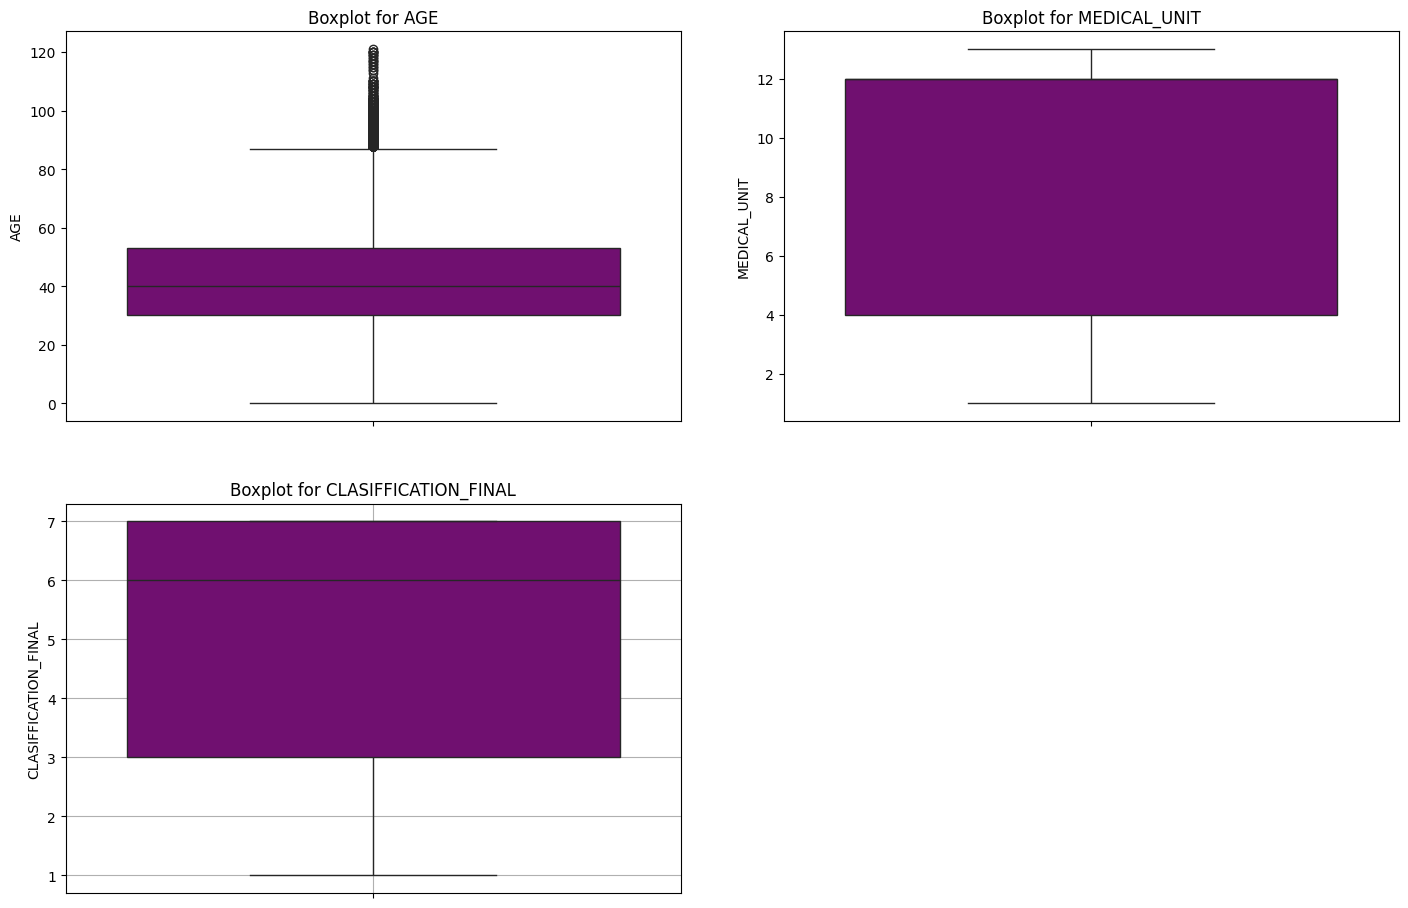

In [18]:
plt.figure(figsize=(15, 10))
for index, col in enumerate(numerical_columns):

    plt.subplot(2, 2 , index + 1)
    sns.boxplot(data=covid_data, y=col, color='purple')
    plt.title(f'Boxplot for {col}')

plt.tight_layout(pad=4)
plt.grid(True)
plt.show()

In [159]:
#finding the outliers
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = covid_data[numerical_columns].quantile(0.25)
Q3 = covid_data[numerical_columns].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows where any column has an outlier
outliers = covid_data[(covid_data[numerical_columns] < lower_bound) | (covid_data[numerical_columns] > upper_bound)].dropna(how='all')

# Display only outlier rows
outliers.sample(20)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,death_status
143101,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92424,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46297,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593928,NaN,NaN,NaN,NaN,NaN,NaN,93.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521329,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99744,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865861,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445991,NaN,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47660,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46077,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
outliers.shape

(5334, 21)

- **We checked for the outlier values in the numerical features `AGE`, `MEDICAL_UNIT`, and `CLASIFFICATION_FINAL` using IQR method.** <br>
- **Also, we used boxplots to visualize the outliers as shown above in cell 18.** <br>
- **We, discovered that the `AGE` column contains outliers which we shall handle later.**


- ## Handling Outliers

In [162]:
outliers.sample(30)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,death_status
381759,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849268,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335733,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035720,NaN,NaN,NaN,NaN,NaN,NaN,93.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122392,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488861,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393463,NaN,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431704,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272111,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132095,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- **Statistically, when the data distribution of patients was visualized in boxplot, it showed that it contained outliers.** <br>
- **However, we could not notice any impossible values for age like 150, 200, 500, 999** <br>
- **Since, the outliers account for very small portion (around 0.5%), we shall keep them as they were.**

- ## Cleaning the binary columns

In [20]:
binary_columns

['SEX',
 'INTUBED',
 'PNEUMONIA',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'ICU',
 'death_status']

- ### Checking for unique values in binary columns

In [21]:
for col in binary_columns:
    display(covid_data[col].value_counts())
    print('\n-----------------------------------------\n')

SEX
Female    525064
Male      523511
Name: count, dtype: int64


-----------------------------------------



INTUBED
97    848544
2     159050
1      33656
99      7325
Name: count, dtype: int64


-----------------------------------------



PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64


-----------------------------------------



PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64


-----------------------------------------



DIABETES
2     920248
1     124989
98      3338
Name: count, dtype: int64


-----------------------------------------



COPD
2     1030510
1       15062
98       3003
Name: count, dtype: int64


-----------------------------------------



ASTHMA
2     1014024
1       31572
98       2979
Name: count, dtype: int64


-----------------------------------------



INMSUPR
2     1031001
1       14170
98       3404
Name: count, dtype: int64


-----------------------------------------



HIPERTENSION
2     882742
1     162729
98      3104
Name: count, dtype: int64


-----------------------------------------



OTHER_DISEASE
2     1015490
1       28040
98       5045
Name: count, dtype: int64


-----------------------------------------



CARDIOVASCULAR
2     1024730
1       20769
98       3076
Name: count, dtype: int64


-----------------------------------------



OBESITY
2     885727
1     159816
98      3032
Name: count, dtype: int64


-----------------------------------------



RENAL_CHRONIC
2     1026665
1       18904
98       3006
Name: count, dtype: int64


-----------------------------------------



TOBACCO
2     960979
1      84376
98      3220
Name: count, dtype: int64


-----------------------------------------



ICU
97    848544
2     175685
1      16858
99      7488
Name: count, dtype: int64


-----------------------------------------



death_status
Alive       971633
Deceased     76942
Name: count, dtype: int64


-----------------------------------------



- **We can observe that the above columns have values 1, 2, 97, 98 and 99 in which:** <br>
    - **1** means 'Yes'
    - **2** means 'No'
    - **97** and **99** means missing values <br><br>
    
- **However, we can also see '98' in most of the columns which could be the error while data entry.** <br> 
- **Since, we can observere that in most of the columns the number of value 98 accounts to very little portion less than 2% of the data, we will consider the value 98 also as missing values.** <br>


- ### Replacing 97, 98, and 99 as np.nan object (missing value)

In [22]:
covid_data[binary_columns] = covid_data[binary_columns].replace([97, 98, 99], np.nan)

In [23]:
covid_data.dtypes

USMER                     int64
MEDICAL_UNIT              int64
SEX                      object
PATIENT_TYPE              int64
INTUBED                 float64
PNEUMONIA               float64
AGE                       int64
PREGNANT                float64
DIABETES                float64
COPD                    float64
ASTHMA                  float64
INMSUPR                 float64
HIPERTENSION            float64
OTHER_DISEASE           float64
CARDIOVASCULAR          float64
OBESITY                 float64
RENAL_CHRONIC           float64
TOBACCO                 float64
CLASIFFICATION_FINAL      int64
ICU                     float64
death_status             object
dtype: object

-**After replacing the values, we can observe that the data type of the binary columns is changed into float64 type.** <br>
-**We will change the float64 datatype into int64 type.**

In [24]:
covid_data[[col for col in binary_columns if col not in ['SEX', 'death_status']]] = covid_data[[col for col in binary_columns if col not in ['SEX', 'death_status']]].astype('Int64')

In [25]:
covid_data.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                     object
PATIENT_TYPE             int64
INTUBED                  Int64
PNEUMONIA                Int64
AGE                      int64
PREGNANT                 Int64
DIABETES                 Int64
COPD                     Int64
ASTHMA                   Int64
INMSUPR                  Int64
HIPERTENSION             Int64
OTHER_DISEASE            Int64
CARDIOVASCULAR           Int64
OBESITY                  Int64
RENAL_CHRONIC            Int64
TOBACCO                  Int64
CLASIFFICATION_FINAL     int64
ICU                      Int64
death_status            object
dtype: object

- ### Again, checking for unique values in binary columns

In [26]:
for col in binary_columns:
    display(covid_data[col].value_counts())
    print('\n-----------------------------------------\n')

SEX
Female    525064
Male      523511
Name: count, dtype: int64


-----------------------------------------



INTUBED
2    159050
1     33656
Name: count, dtype: Int64


-----------------------------------------



PNEUMONIA
2    892534
1    140038
Name: count, dtype: Int64


-----------------------------------------



PREGNANT
2    513179
1      8131
Name: count, dtype: Int64


-----------------------------------------



DIABETES
2    920248
1    124989
Name: count, dtype: Int64


-----------------------------------------



COPD
2    1030510
1      15062
Name: count, dtype: Int64


-----------------------------------------



ASTHMA
2    1014024
1      31572
Name: count, dtype: Int64


-----------------------------------------



INMSUPR
2    1031001
1      14170
Name: count, dtype: Int64


-----------------------------------------



HIPERTENSION
2    882742
1    162729
Name: count, dtype: Int64


-----------------------------------------



OTHER_DISEASE
2    1015490
1      28040
Name: count, dtype: Int64


-----------------------------------------



CARDIOVASCULAR
2    1024730
1      20769
Name: count, dtype: Int64


-----------------------------------------



OBESITY
2    885727
1    159816
Name: count, dtype: Int64


-----------------------------------------



RENAL_CHRONIC
2    1026665
1      18904
Name: count, dtype: Int64


-----------------------------------------



TOBACCO
2    960979
1     84376
Name: count, dtype: Int64


-----------------------------------------



ICU
2    175685
1     16858
Name: count, dtype: Int64


-----------------------------------------



death_status
Alive       971633
Deceased     76942
Name: count, dtype: int64


-----------------------------------------



- **Now, we can see that the binary columns contain only two values.**

- ### Checking for missing value in binary columns

In [27]:
covid_data[binary_columns].isna().sum()

SEX                    0
INTUBED           855869
PNEUMONIA          16003
PREGNANT          527265
DIABETES            3338
COPD                3003
ASTHMA              2979
INMSUPR             3404
HIPERTENSION        3104
OTHER_DISEASE       5045
CARDIOVASCULAR      3076
OBESITY             3032
RENAL_CHRONIC       3006
TOBACCO             3220
ICU               856032
death_status           0
dtype: int64

In [28]:
covid_data.isna().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 855869
PNEUMONIA                16003
AGE                          0
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
death_status                 0
dtype: int64

In [29]:
threshold = 0.8
missing_ratio = pd.DataFrame((covid_data.isna().sum() / len(covid_data)) * 100, columns = ['Missing Data Ratio'])
missing_ratio

,Missing Data Ratio
USMER,0.000000
MEDICAL_UNIT,0.000000
SEX,0.000000
PATIENT_TYPE,0.000000
INTUBED,81.622106
PNEUMONIA,1.526166
AGE,0.000000
PREGNANT,50.283957
DIABETES,0.318337
COPD,0.286389


**We can observe above that the missing values in the binary columns 'INTUBED', 'PREGNANT', and 'ICU' accounts for more than 50 percent, even 80 percent in 'INTUBED', and 'ICU'** <br>
- **Filling the missing values in these columns either with mean, median, or mode could distort the data.**
- **Also, dropping the missing values could result in loss of important data.** <br><br>
- **So, we will first handle the missing values in other binary columns.**

In [30]:
cols_to_clean = [col for col in binary_columns if col not in ['INTUBED', 'PREGNANT', 'ICU']]
covid_data = covid_data.dropna(subset=cols_to_clean)

In [31]:
covid_data.isna().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 835406
PNEUMONIA                    0
AGE                          0
PREGNANT                515111
DIABETES                     0
COPD                         0
ASTHMA                       0
INMSUPR                      0
HIPERTENSION                 0
OTHER_DISEASE                0
CARDIOVASCULAR               0
OBESITY                      0
RENAL_CHRONIC                0
TOBACCO                      0
CLASIFFICATION_FINAL         0
ICU                     835564
death_status                 0
dtype: int64

**We will flag the missing values in the columns 'INTUBED', 'PREGNANT', and 'ICU' with the value 3 which we will later be remarked as 'Unknown'.**

In [32]:
covid_data[['INTUBED', 'PREGNANT', 'ICU']] = covid_data[['INTUBED', 'PREGNANT', 'ICU']].fillna(3)

In [33]:
covid_data.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
death_status            0
dtype: int64

In [34]:
covid_data.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                     object
PATIENT_TYPE             int64
INTUBED                  Int64
PNEUMONIA                Int64
AGE                      int64
PREGNANT                 Int64
DIABETES                 Int64
COPD                     Int64
ASTHMA                   Int64
INMSUPR                  Int64
HIPERTENSION             Int64
OTHER_DISEASE            Int64
CARDIOVASCULAR           Int64
OBESITY                  Int64
RENAL_CHRONIC            Int64
TOBACCO                  Int64
CLASIFFICATION_FINAL     int64
ICU                      Int64
death_status            object
dtype: object

In [36]:
for col in covid_data.columns:
    print(covid_data[col].value_counts())
    print('\n-----------------------\n')

USMER
2    658255
1    366897
Name: count, dtype: int64

-----------------------

MEDICAL_UNIT
12    591811
4     307177
6      37868
9      37384
3      18660
8      10097
10      7543
5       7062
11      5556
7        871
13       813
2        159
1        151
Name: count, dtype: int64

-----------------------

SEX
Female    513216
Male      511936
Name: count, dtype: int64

-----------------------

PATIENT_TYPE
1    833253
2    191899
Name: count, dtype: int64

-----------------------

INTUBED
3    835406
2    156712
1     33034
Name: count, dtype: Int64

-----------------------

PNEUMONIA
2    887553
1    137599
Name: count, dtype: Int64

-----------------------

AGE
30     26548
31     25502
28     24816
29     24681
34     24495
       ...  
118        2
115        2
111        1
121        1
113        1
Name: count, Length: 121, dtype: int64

-----------------------

PREGNANT
3    515111
2    502200
1      7841
Name: count, dtype: Int64

-----------------------

DIABETES
2    

In [37]:
binary_columns

['SEX',
 'INTUBED',
 'PNEUMONIA',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'ICU',
 'death_status']

In [38]:
cols_to_update = [col for col in binary_columns if col not in ['SEX', 'death_status']]
covid_data[cols_to_update] = covid_data[cols_to_update].applymap(lambda x: 'Yes' if x == 1 else 'No' if x == 2 else 'Unknown')

In [39]:
covid_data[['PATIENT_TYPE']].value_counts()

PATIENT_TYPE
1               833253
2               191899
Name: count, dtype: int64

In [40]:
covid_data['PATIENT_TYPE'] = covid_data['PATIENT_TYPE'].map({1 : 'Outpatient', 2 : 'Hospitalized'})

In [41]:
covid_data.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                     object
PATIENT_TYPE            object
INTUBED                 object
PNEUMONIA               object
AGE                      int64
PREGNANT                object
DIABETES                object
COPD                    object
ASTHMA                  object
INMSUPR                 object
HIPERTENSION            object
OTHER_DISEASE           object
CARDIOVASCULAR          object
OBESITY                 object
RENAL_CHRONIC           object
TOBACCO                 object
CLASIFFICATION_FINAL     int64
ICU                     object
death_status            object
dtype: object

In [42]:
covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,death_status
0,2,1,Female,Outpatient,Unknown,Yes,65,No,No,No,...,No,Yes,No,No,No,No,No,3,Unknown,Deceased
1,2,1,Male,Outpatient,Unknown,Yes,72,Unknown,No,No,...,No,Yes,No,No,Yes,Yes,No,5,Unknown,Deceased
2,2,1,Male,Hospitalized,Yes,No,55,Unknown,Yes,No,...,No,No,No,No,No,No,No,3,No,Deceased
3,2,1,Female,Outpatient,Unknown,No,53,No,No,No,...,No,No,No,No,No,No,No,7,Unknown,Deceased
4,2,1,Male,Outpatient,Unknown,No,68,Unknown,Yes,No,...,No,Yes,No,No,No,No,No,3,Unknown,Deceased


In [43]:
covid_data.describe(exclude=object)

,USMER,MEDICAL_UNIT,AGE,CLASIFFICATION_FINAL
count,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06
mean,1.642105e+00,8.993643e+00,4.188778e+01,5.291136e+00
std,4.793813e-01,3.722439e+00,1.674833e+01,1.889586e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,3.000000e+01,3.000000e+00
50%,2.000000e+00,1.200000e+01,4.000000e+01,6.000000e+00
75%,2.000000e+00,1.200000e+01,5.300000e+01,7.000000e+00
max,2.000000e+00,1.300000e+01,1.210000e+02,7.000000e+00


In [44]:
covid_data.describe(include=object)

,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,death_status
count,1025152,1025152,1025152,1025152,1025152,1025152,1025152,1025152,1025152,1025152,1025152,1025152,1025152,1025152,1025152,1025152,1025152
unique,2,2,3,2,3,2,2,2,2,2,2,2,2,2,2,3,2
top,Female,Outpatient,Unknown,No,Unknown,No,No,No,No,No,No,No,No,No,No,Unknown,Alive
freq,513216,833253,835406,887553,515111,902737,1010776,994655,1011564,865575,998021,1005026,868191,1006801,942477,835564,950438


In [45]:
covid_data.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
death_status            0
dtype: int64

- ### Now, we have successfully cleaned the dataset.
- ### The next step is exploratory data analysis of the dataset.

In [46]:
covid_data.to_csv('../data/covid_data_cleaned.csv', index=False)

# II. Data Exploration and Visualization (EDA)

# 1. Demographics and Patient Profile

## 1.1. Age Distribution of the Patients:

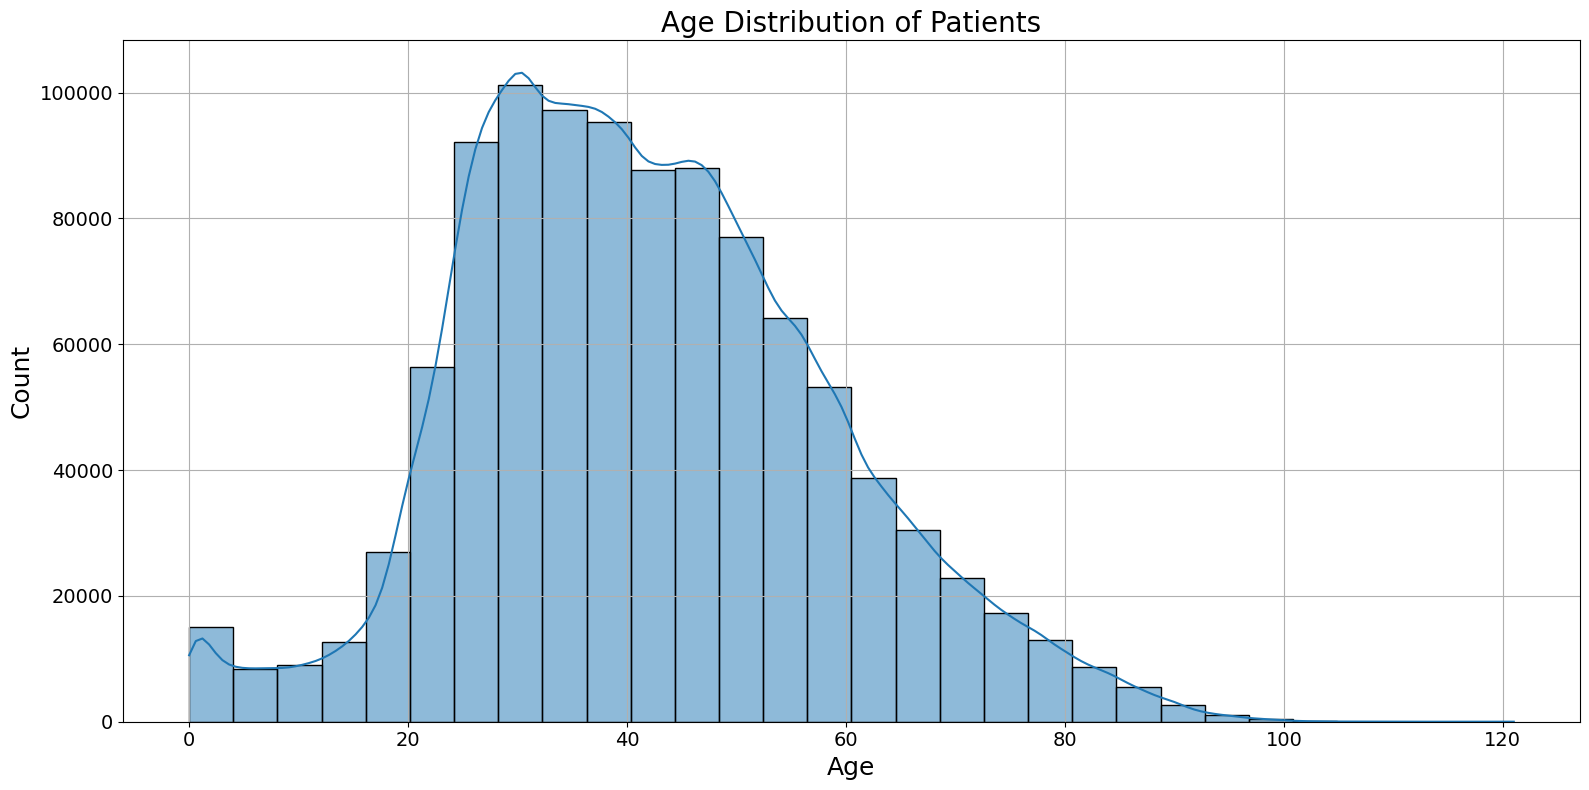

In [168]:
plt.figure(figsize=(16, 8))
sns.histplot(data=covid_data, x='AGE', bins=30, kde=True)
plt.title('Age Distribution of Patients', fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

## 1.2. Gender Distribution of Patients

In [48]:
def count_plot(data=covid_data, x=None, y=None, hue=None, order=None, title=None, xlabel=None, ylabel='Patient Count', legend_title=None, color=None, palette=None):
    plt.figure(figsize=(16, 8))
    gender_bar = sns.countplot(data=data, x=x, hue=hue, order=order, color=color, palette=palette)
    
    for container in gender_bar.containers:
        gender_bar.bar_label(container)
    
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title=legend_title)
    plt.tight_layout()
    plt.grid(True)
    plt.show()


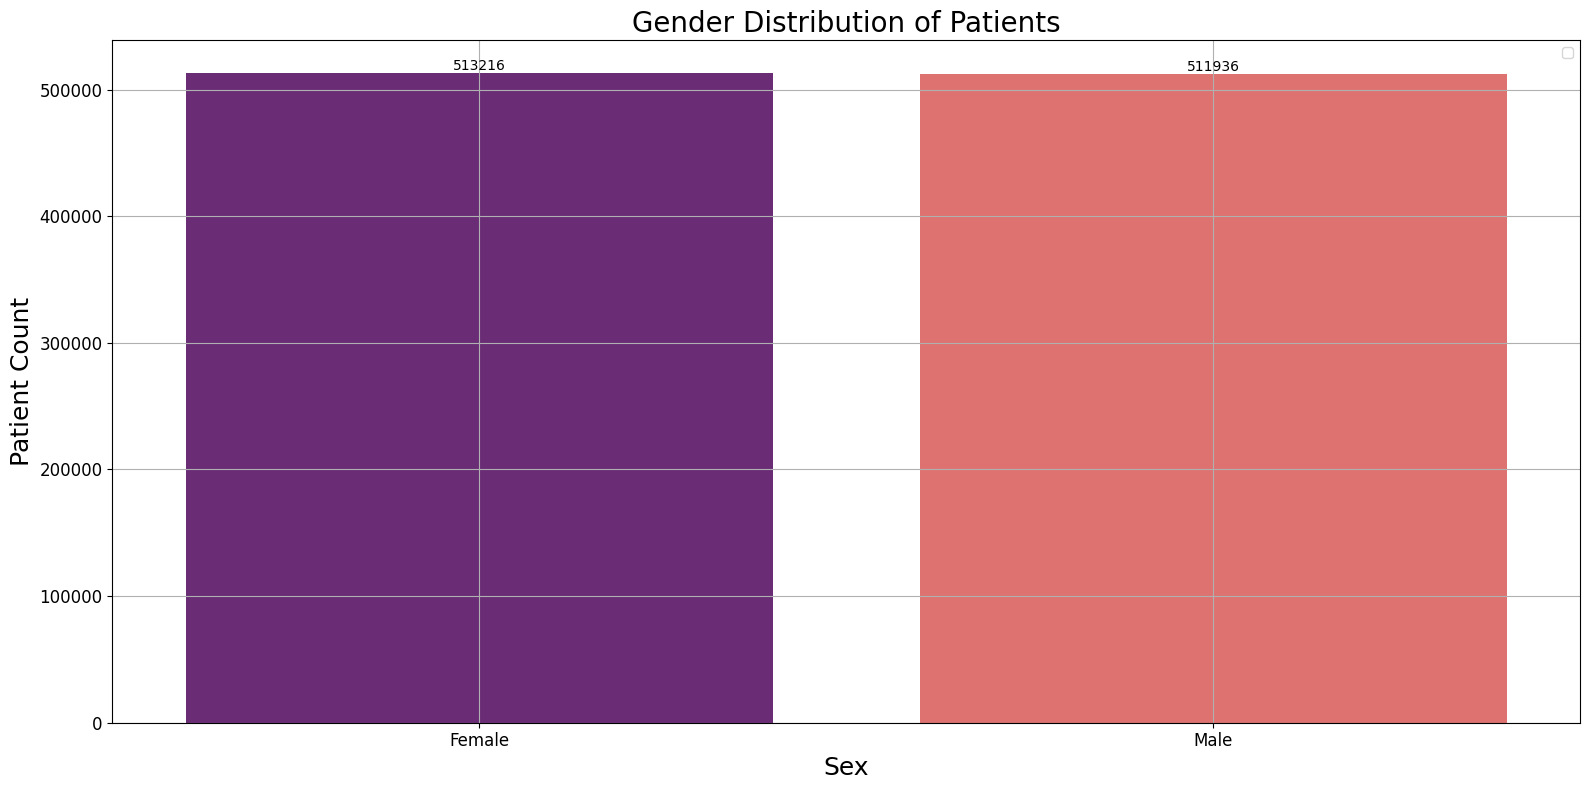

In [49]:
count_plot(x='SEX', title='Gender Distribution of Patients', xlabel='Sex', palette='magma')

## 1.3. Pregnancy Status Distribution of Patients

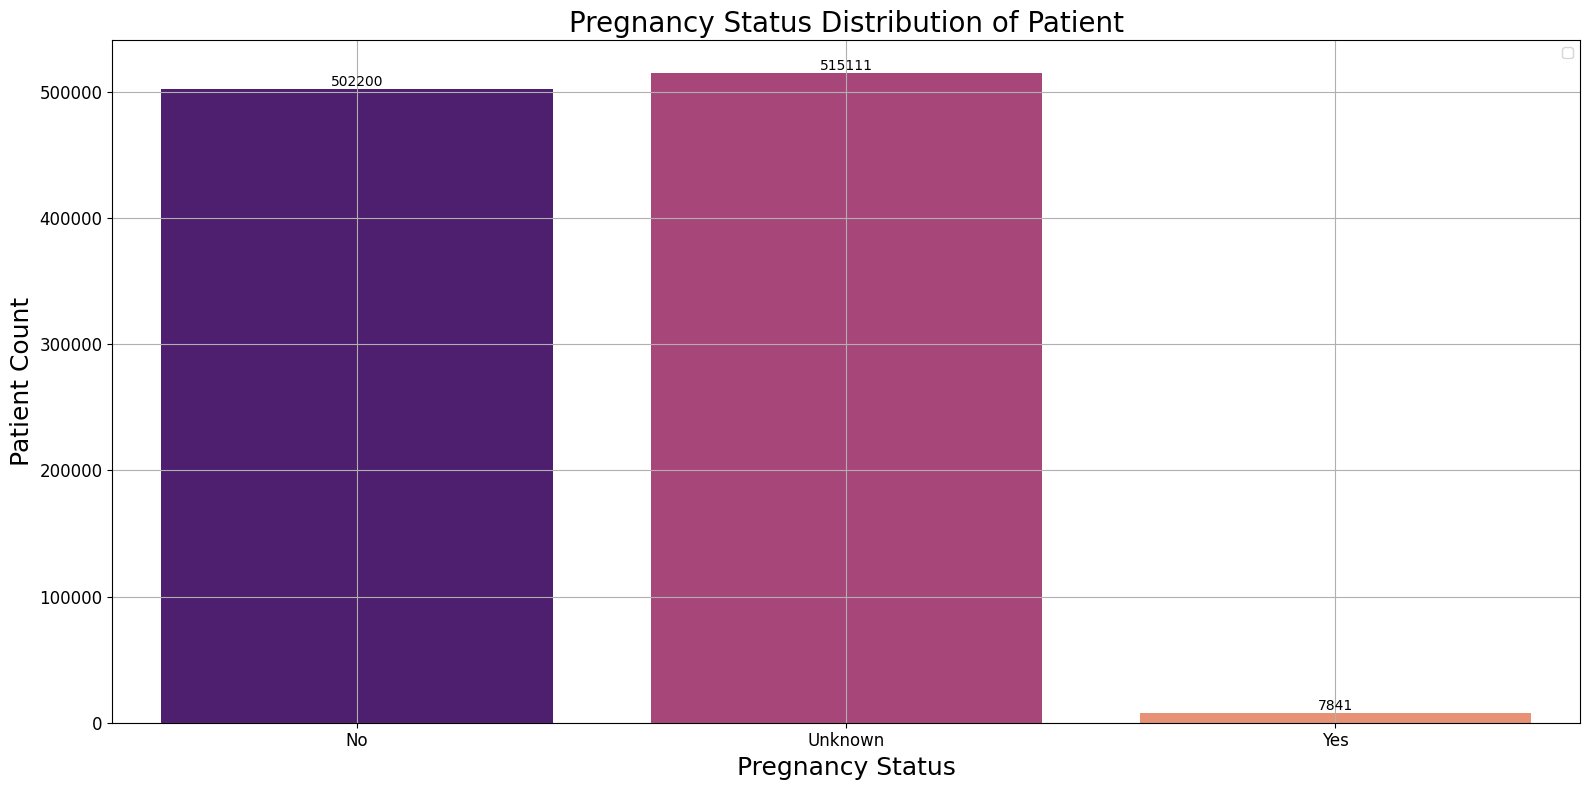

In [50]:
count_plot(x='PREGNANT', title='Pregnancy Status Distribution of Patient', xlabel='Pregnancy Status', palette='magma')

## 1.4. Distribution of the medical care level (1, 2 or 3) received by the patients

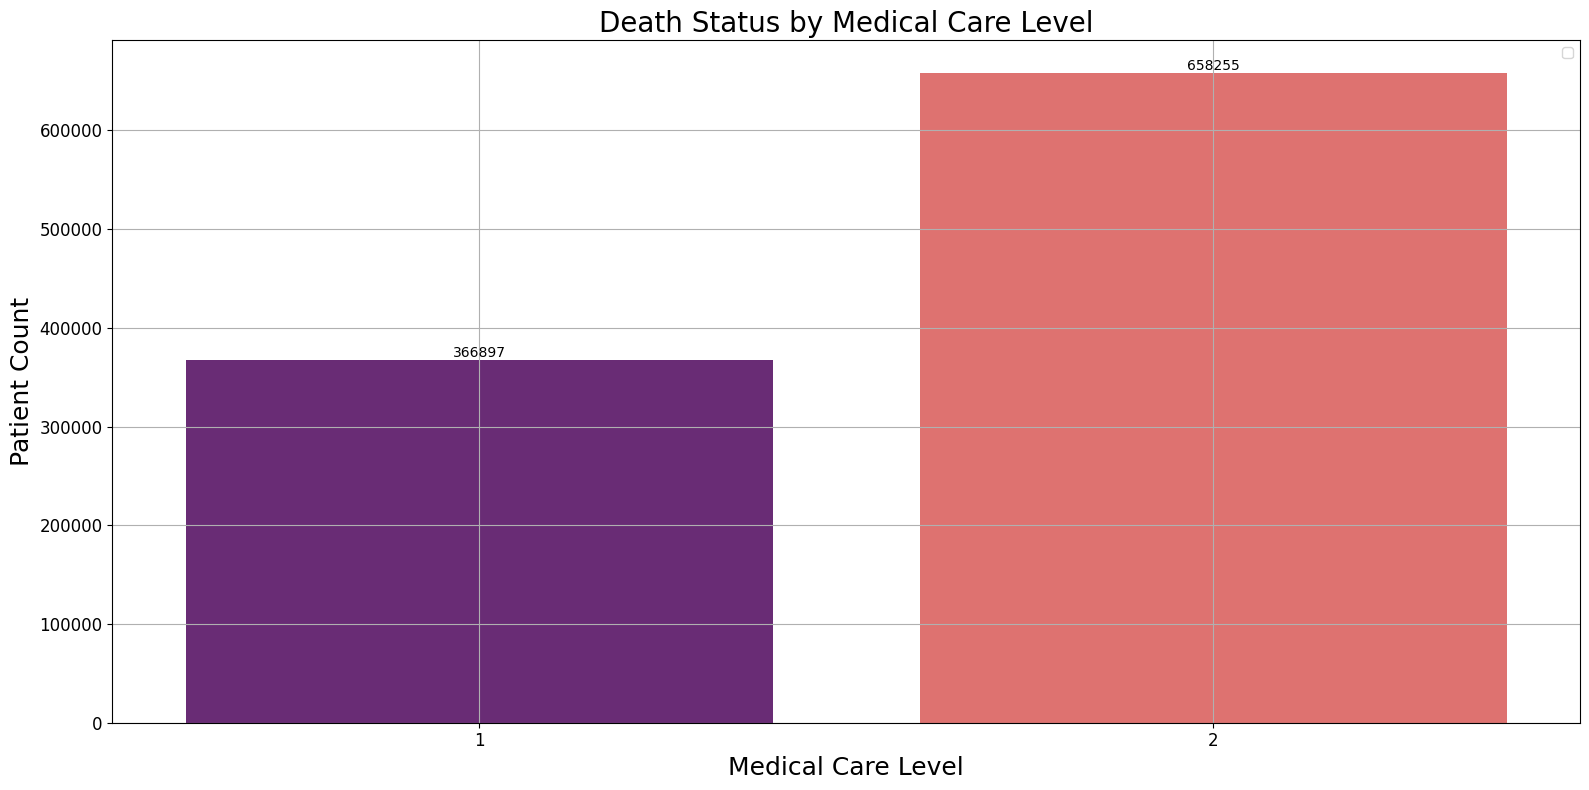

In [51]:
count_plot(x='USMER', title='Death Status by Medical Care Level', xlabel='Medical Care Level', palette='magma')

## 1.5. Frequency Distribution of Medical Units

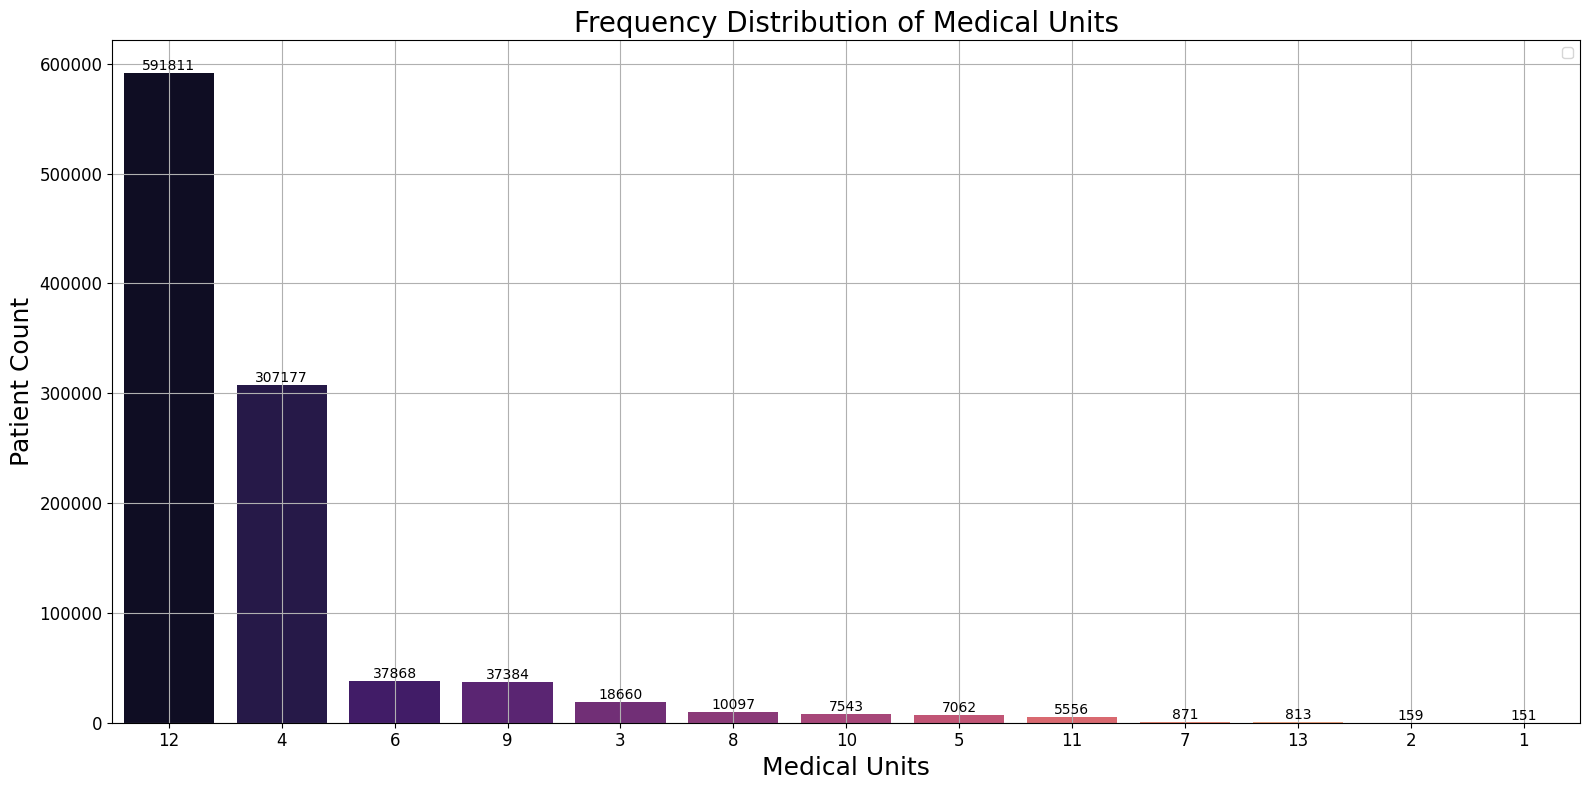

In [52]:
count_plot(x='MEDICAL_UNIT', order=covid_data['MEDICAL_UNIT'].value_counts().index, title='Frequency Distribution of Medical Units', xlabel='Medical Units', palette='magma')

## 1.6. Hospitalization VS Returned Home

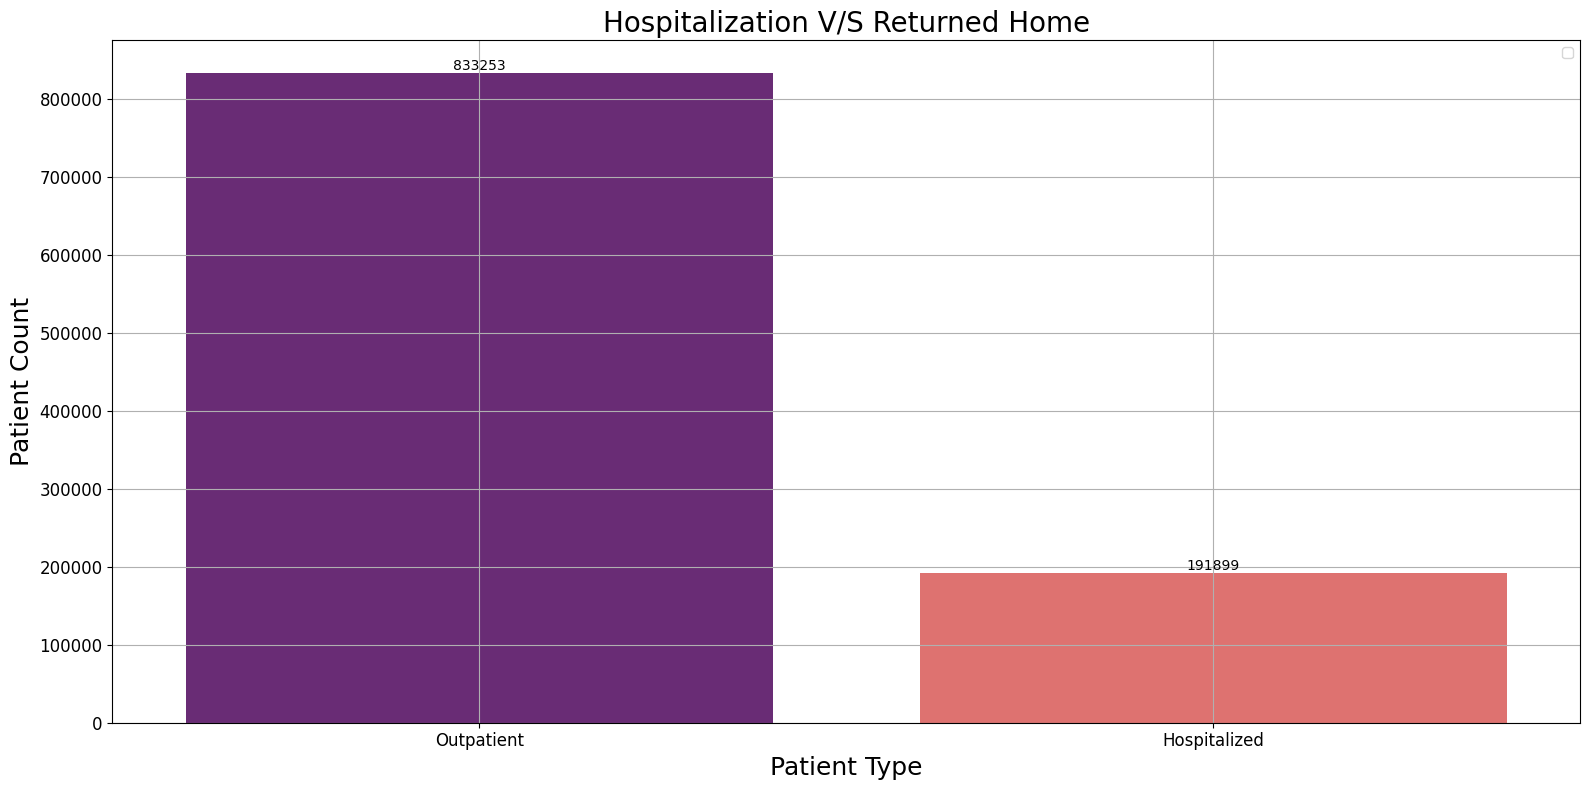

In [53]:
count_plot(x='PATIENT_TYPE', title='Hospitalization V/S Returned Home', xlabel='Patient Type', palette='magma')

## 1.7. Age distribution among the Hospitalized VS Outpatients

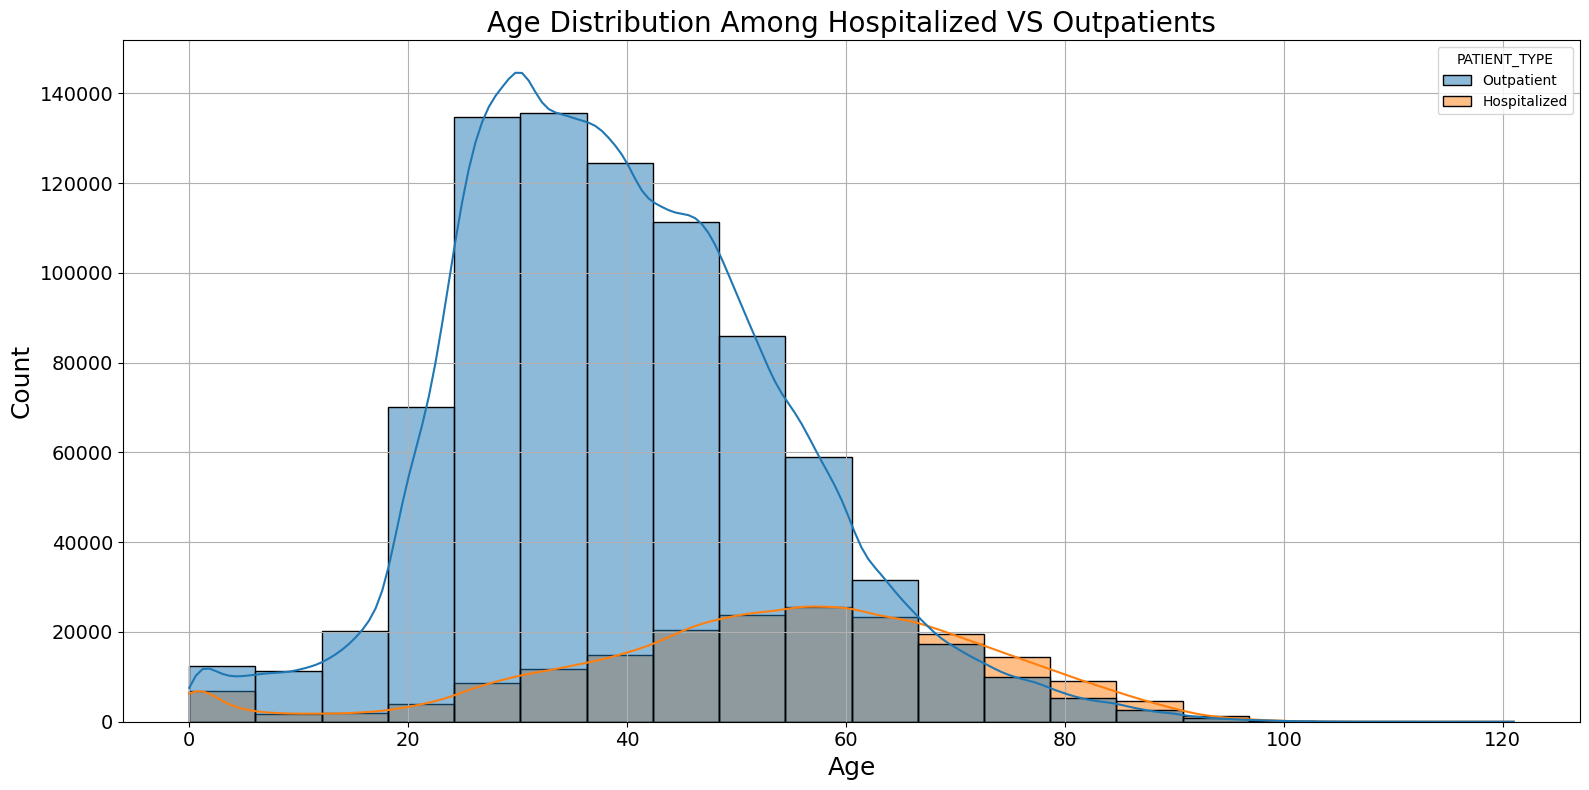

In [54]:
plt.figure(figsize=(16, 8))
sns.histplot(data=covid_data, x='AGE', hue='PATIENT_TYPE', bins=20, kde=True)
plt.title('Age Distribution Among Hospitalized VS Outpatients', fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

- ## Medical Units and ICU Admission

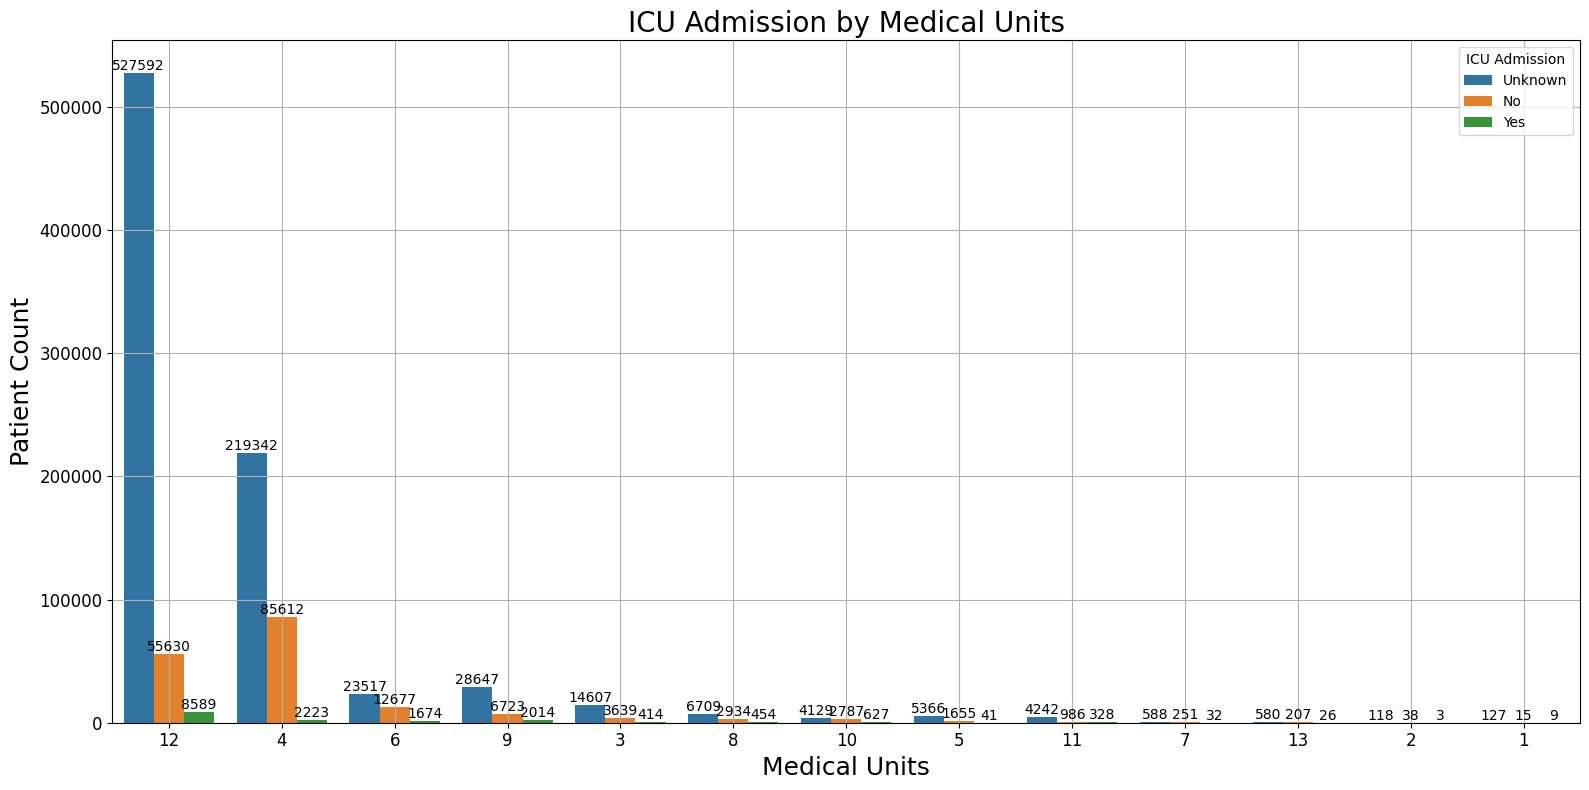

In [55]:
count_plot(x='MEDICAL_UNIT', hue='ICU', order=covid_data['MEDICAL_UNIT'].value_counts().index, title='ICU Admission by Medical Units', xlabel='Medical Units', legend_title='ICU Admission')

# 2. Severity and Critical Cases

## 2.1. Intubation Status

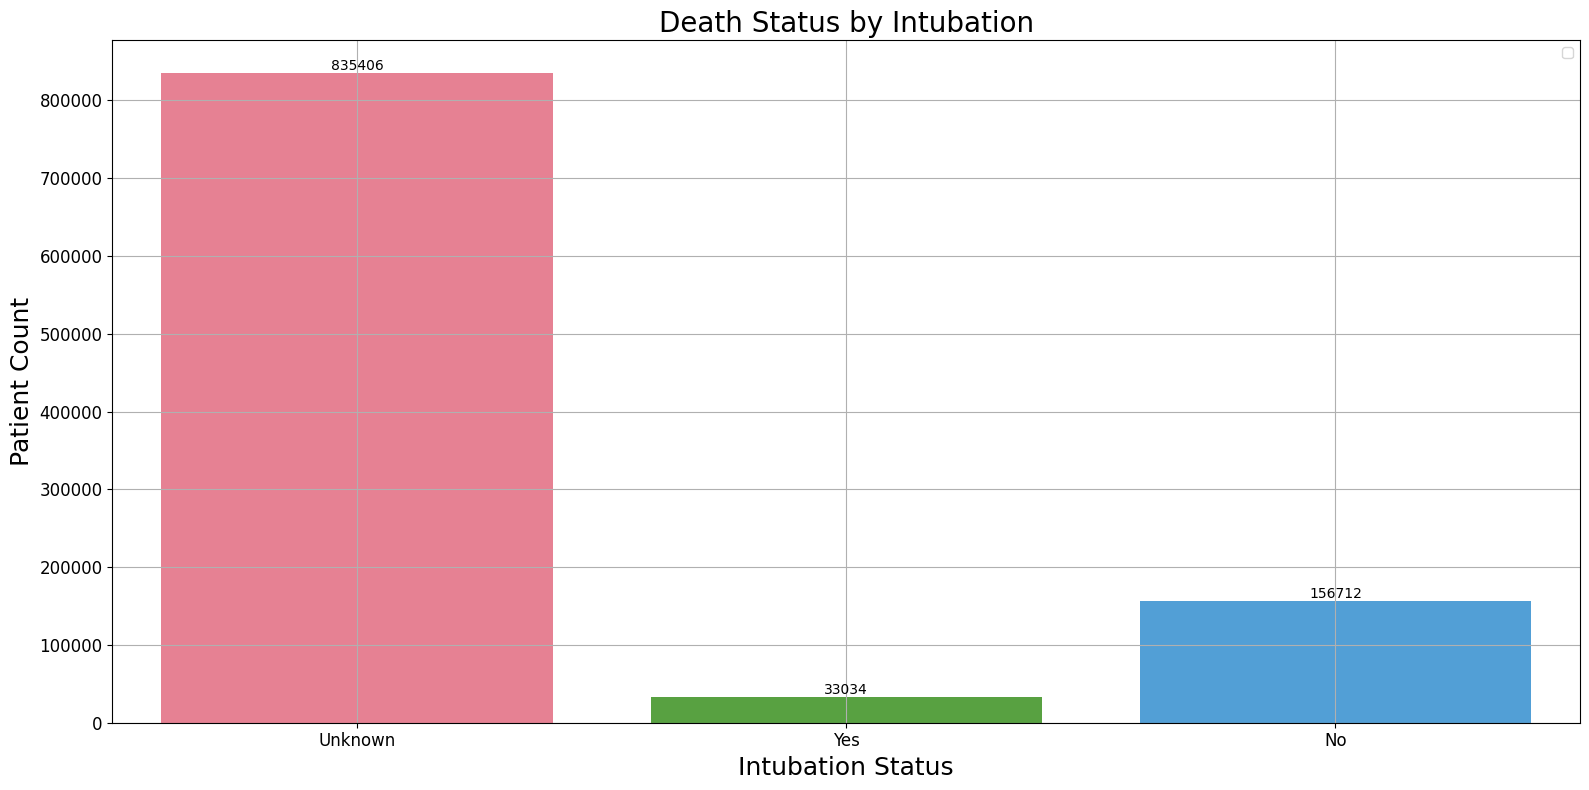

In [56]:
count_plot(x='INTUBED', title='Death Status by Intubation', xlabel='Intubation Status', palette='husl')

## 2.2. ICU Admission Status

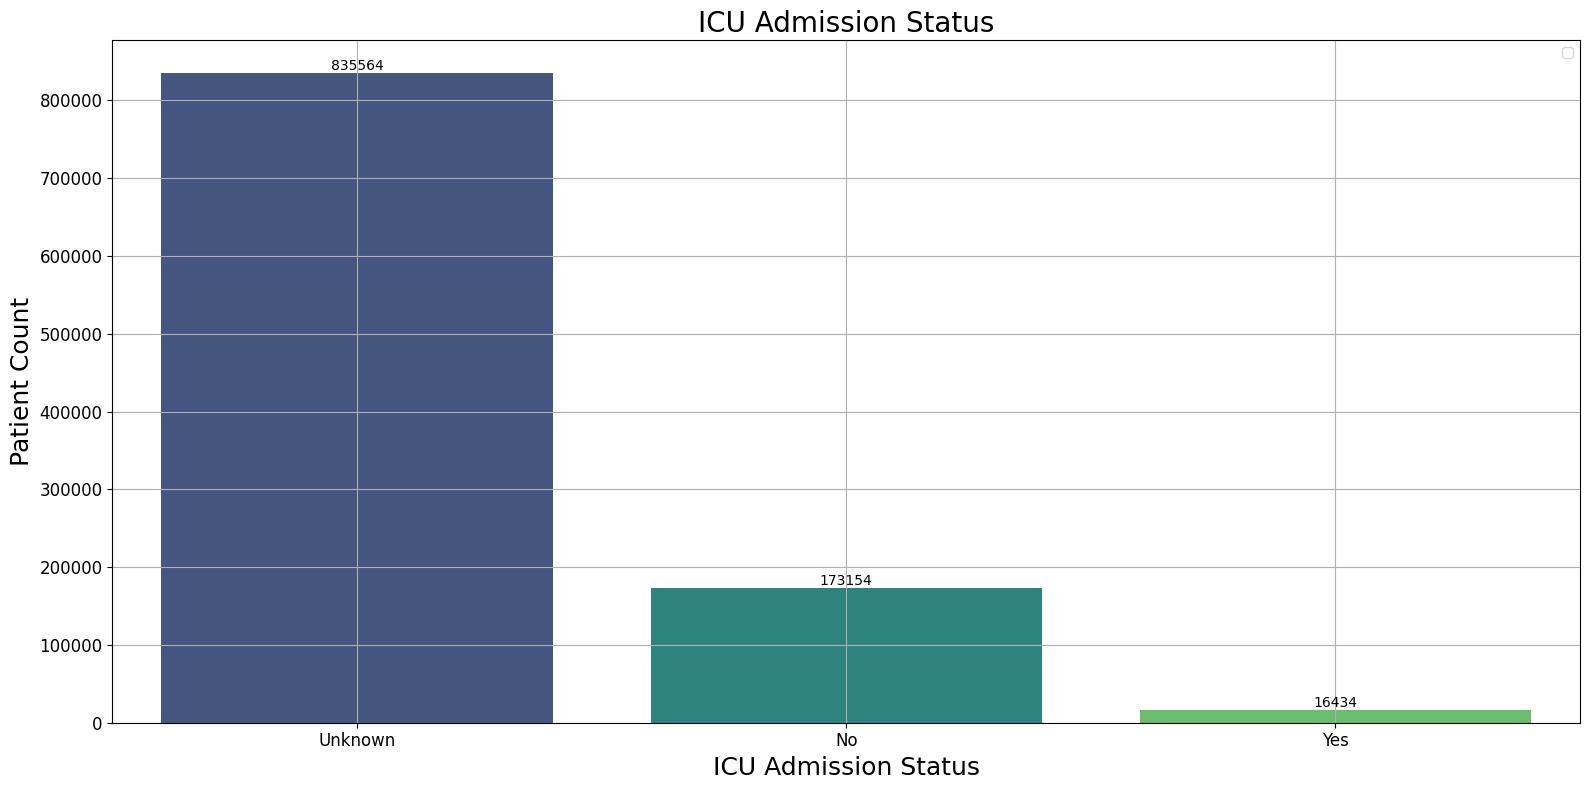

In [57]:
count_plot(x='ICU', title='ICU Admission Status', xlabel='ICU Admission Status', palette='viridis')

## 2.3. Relationship between Intubation Status and ICU Admission

In [58]:
int_icu_df = covid_data[['INTUBED', 'ICU']]

In [59]:
int_icu_df.head()

,INTUBED,ICU
0,Unknown,Unknown
1,Unknown,Unknown
2,Yes,No
3,Unknown,Unknown
4,Unknown,Unknown


In [60]:
int_icu_df.shape

(1025152, 2)

In [61]:
int_icu_df = int_icu_df.replace({'Yes' : 1, 'No': 0, 'Unknown' : np.nan})

In [62]:
int_icu_df.isna().sum()

INTUBED    835406
ICU        835564
dtype: int64

In [63]:
int_icu_df = int_icu_df.dropna()

In [64]:
int_icu_df.isna().sum()

INTUBED    0
ICU        0
dtype: int64

In [65]:
int_icu_df.shape

(189586, 2)

In [66]:
from sklearn.metrics import matthews_corrcoef

int_icu_corr = matthews_corrcoef(int_icu_df['INTUBED'], int_icu_df['ICU'])
print(int_icu_corr)

0.3060069717306245



- **The MCC of **0.31** between `INTUBED` and `ICU` indicates a **moderate positive correlation**. This suggests that intubated patients are more likely to be in the ICU, but not always. Other factors may influence ICU admission. Further analysis can help refine predictions and optimize resource allocation.**

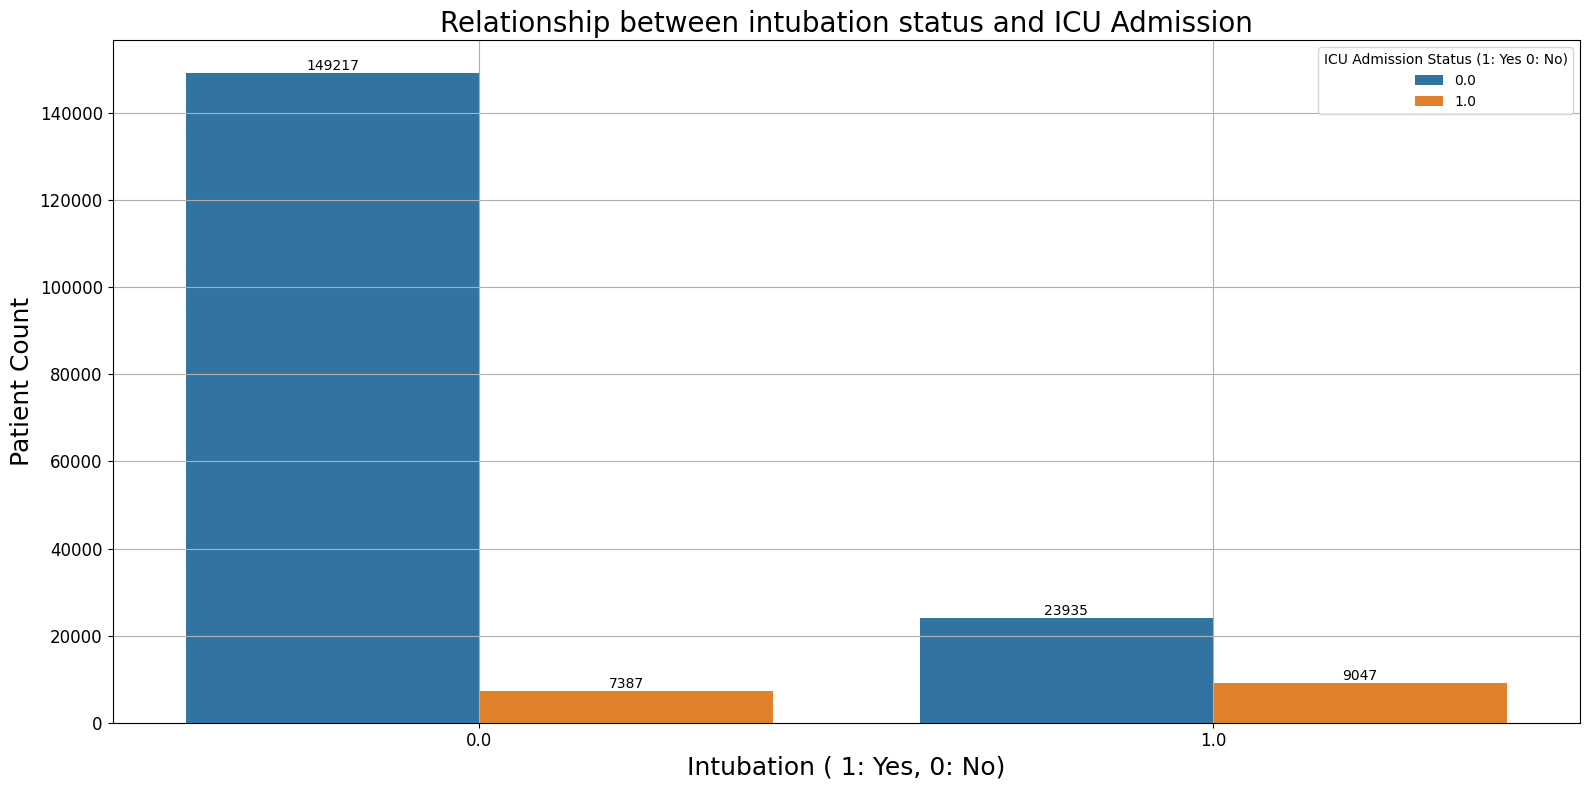

In [67]:

count_plot(data=int_icu_df, x='INTUBED', hue='ICU', title='Relationship between intubation status and ICU Admission', xlabel='Intubation ( 1: Yes, 0: No)', legend_title='ICU Admission Status (1: Yes 0: No)')

## 2.4. Gender Difference in Hospitalization, Intubation and ICU Admission

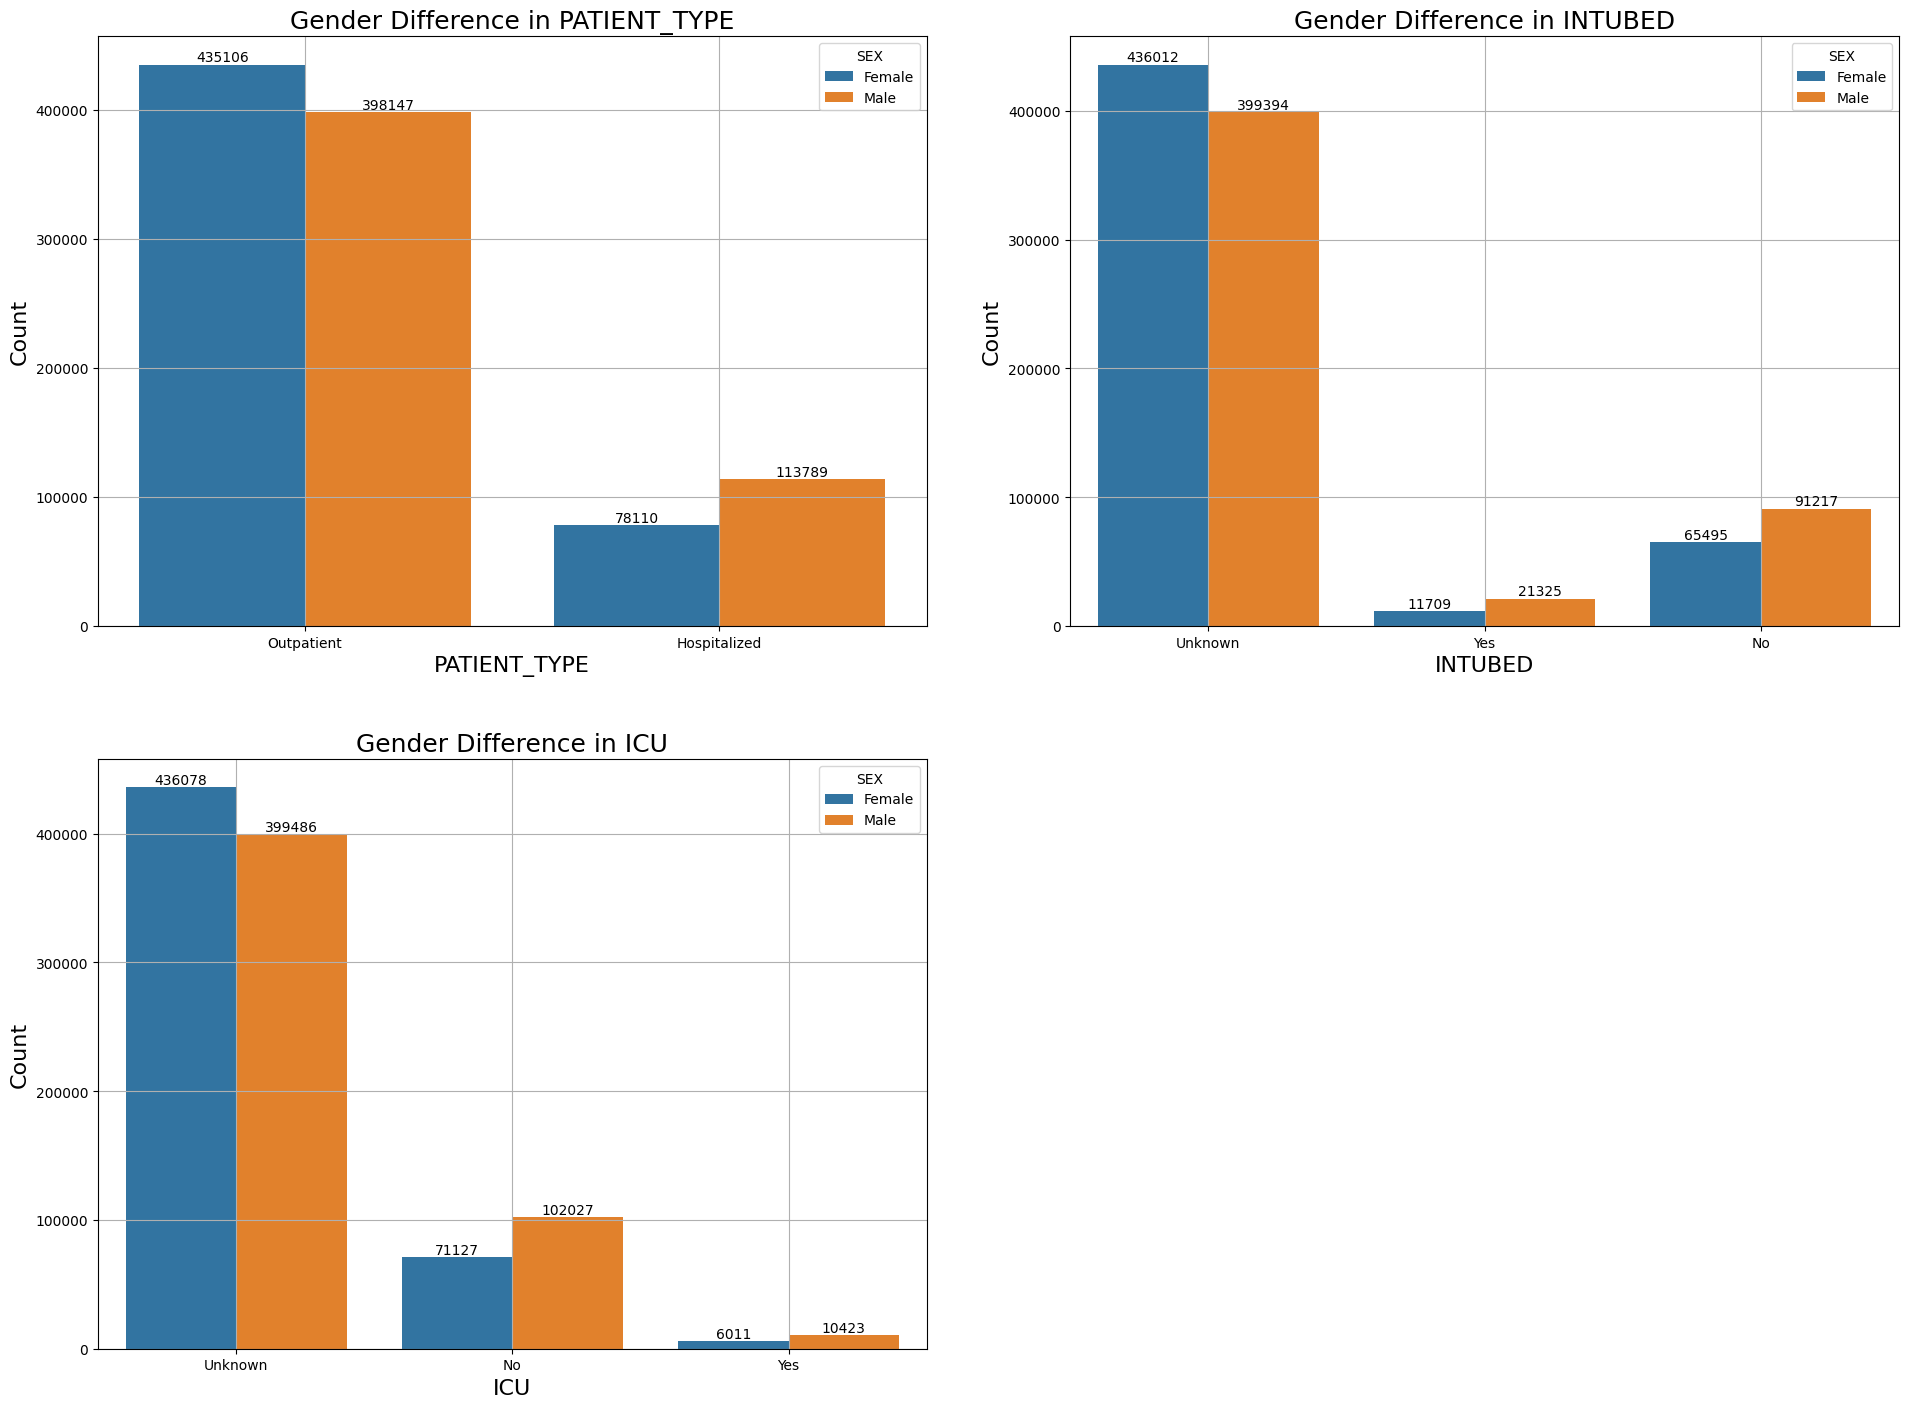

In [68]:
plt.figure(figsize=(20, 15))
for index, col in enumerate(covid_data[['PATIENT_TYPE', 'INTUBED', 'ICU']].columns):
    plt.subplot(2, 2, index + 1)
    ax = sns.countplot(data=covid_data, x=col, hue='SEX')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Gender Difference in {col}', fontsize=18)
    plt.xlabel(f'{col}', fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.grid(True)


plt.tight_layout(pad=4)
plt.show()

## 2.5. Age distribution among intubated and non-intubated patients

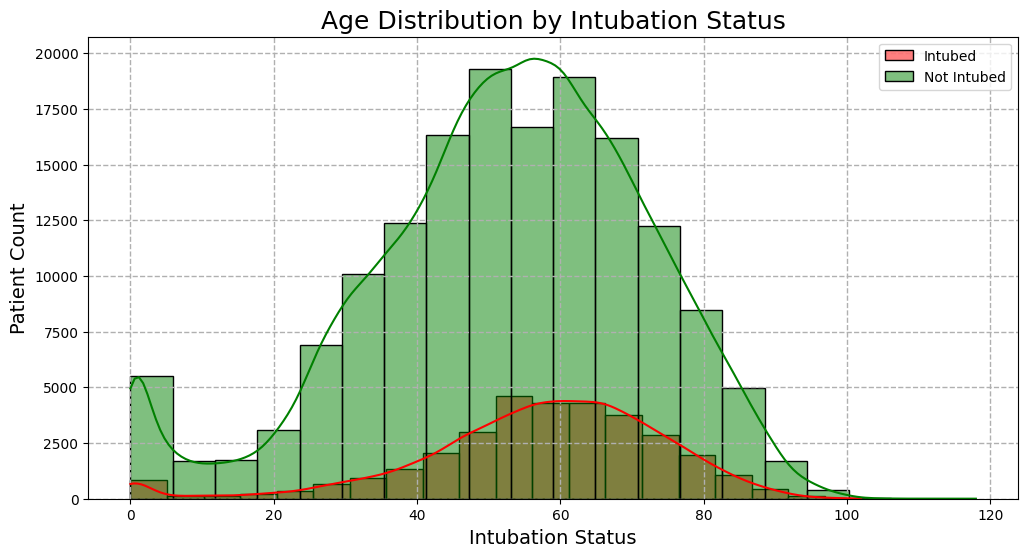

In [169]:
plt.figure(figsize=(12, 6))
sns.histplot(covid_data[covid_data['INTUBED'] == 'Yes']['AGE'], color='red', bins=20, kde=True, label='Intubed')
sns.histplot(covid_data[covid_data['INTUBED'] == 'No']['AGE'], color='green', bins=20, kde=True, label='Not Intubed')
plt.title('Age Distribution by Intubation Status', fontsize=18)
plt.xlabel('Intubation Status', fontsize=14)
plt.ylabel('Patient Count', fontsize=14)
plt.grid(linestyle='--', linewidth=1)

plt.legend()
plt.show()

# 3. Tobacco, Comorbidities and Risk Factors

In [70]:
comorbidities = [
    'PNEUMONIA',
    'DIABETES',
    'COPD',
    'ASTHMA',
    'INMSUPR',
    'HIPERTENSION',
    'OTHER_DISEASE',
    'CARDIOVASCULAR',
    'OBESITY',
    'RENAL_CHRONIC',
    'TOBACCO'
]

## 3.1. Comorbidity Distribution

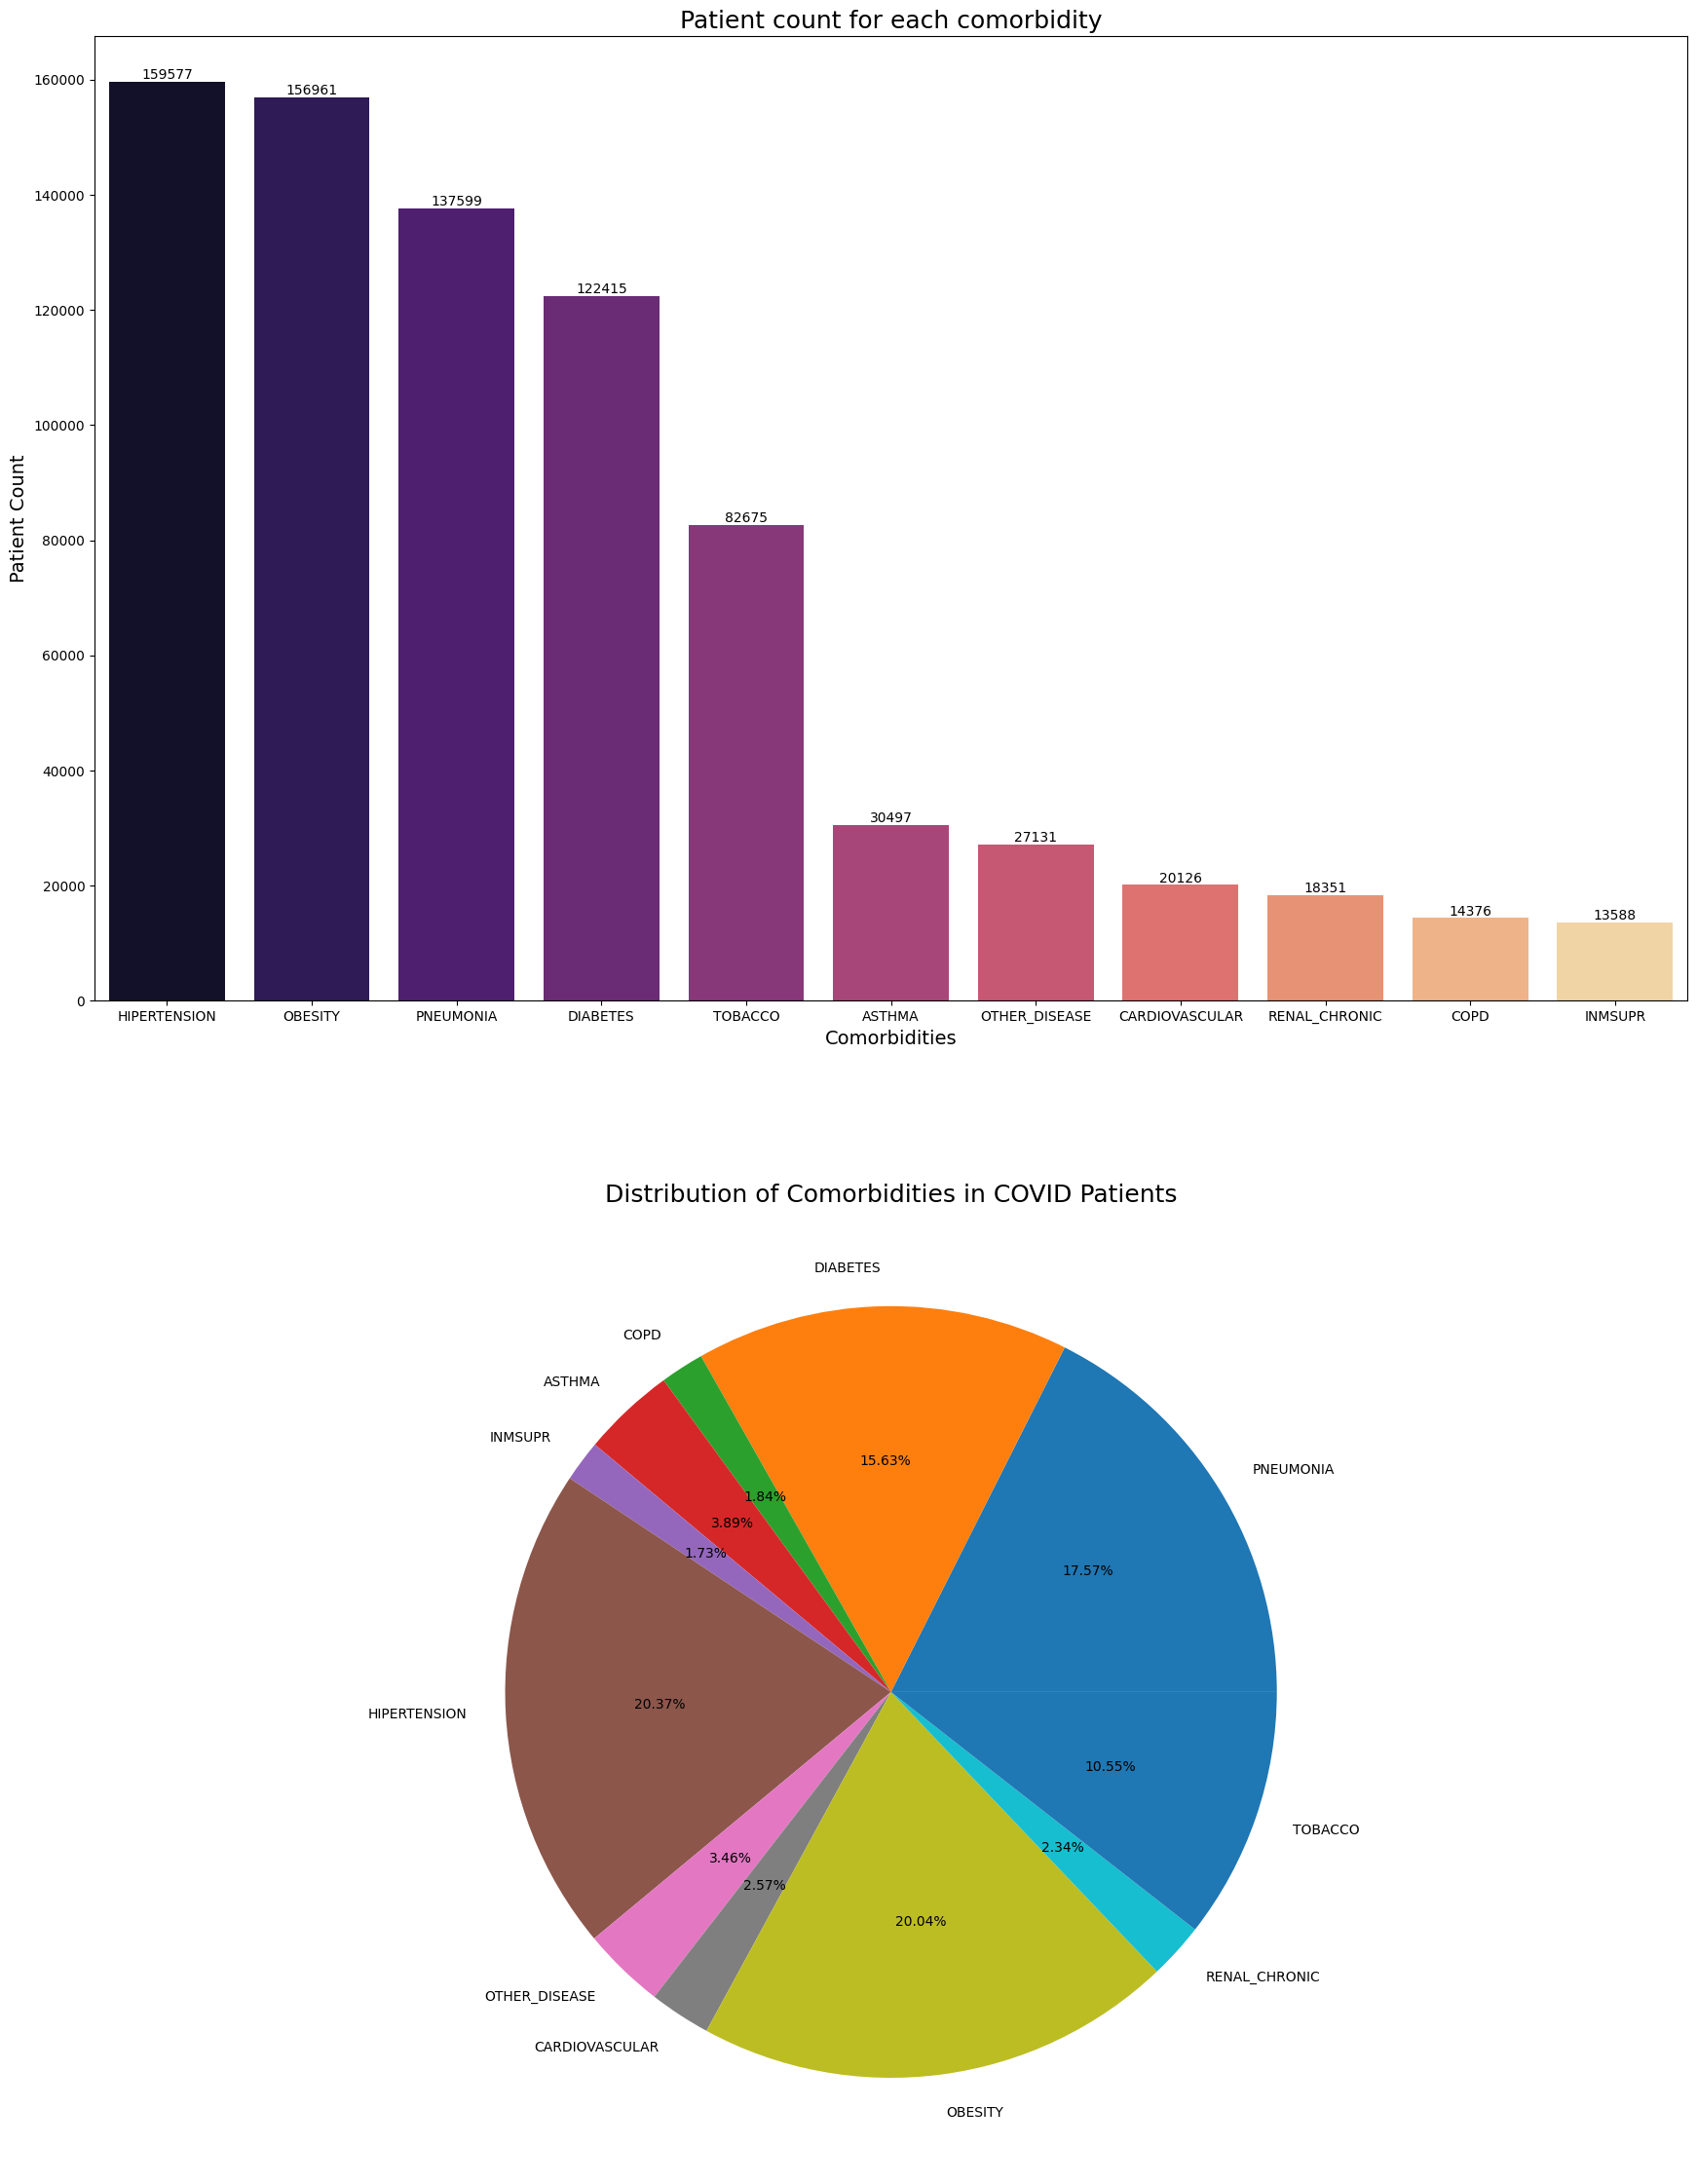

In [71]:
comorbidity_counts = covid_data[comorbidities].apply(lambda x: (x == 'Yes').sum())

plt.figure(figsize=(20, 25))

plt.subplot(2, 1, 1)
bar = sns.barplot(data=comorbidity_counts.sort_values(ascending=False), palette='magma')
for container in bar.containers:
    bar.bar_label(container)
plt.title('Patient count for each comorbidity', fontsize=18)
plt.xlabel('Comorbidities', fontsize=14)
plt.ylabel('Patient Count', fontsize=14)

plt.subplot(2, 1, 2)
plt.pie(x=comorbidity_counts, labels=comorbidities, autopct='%.2f%%')
plt.title('Distribution of Comorbidities in COVID Patients', fontsize=18)
plt.tight_layout(pad=10)
plt.show()

## 3.2. Gender Distribution by Comorbidities

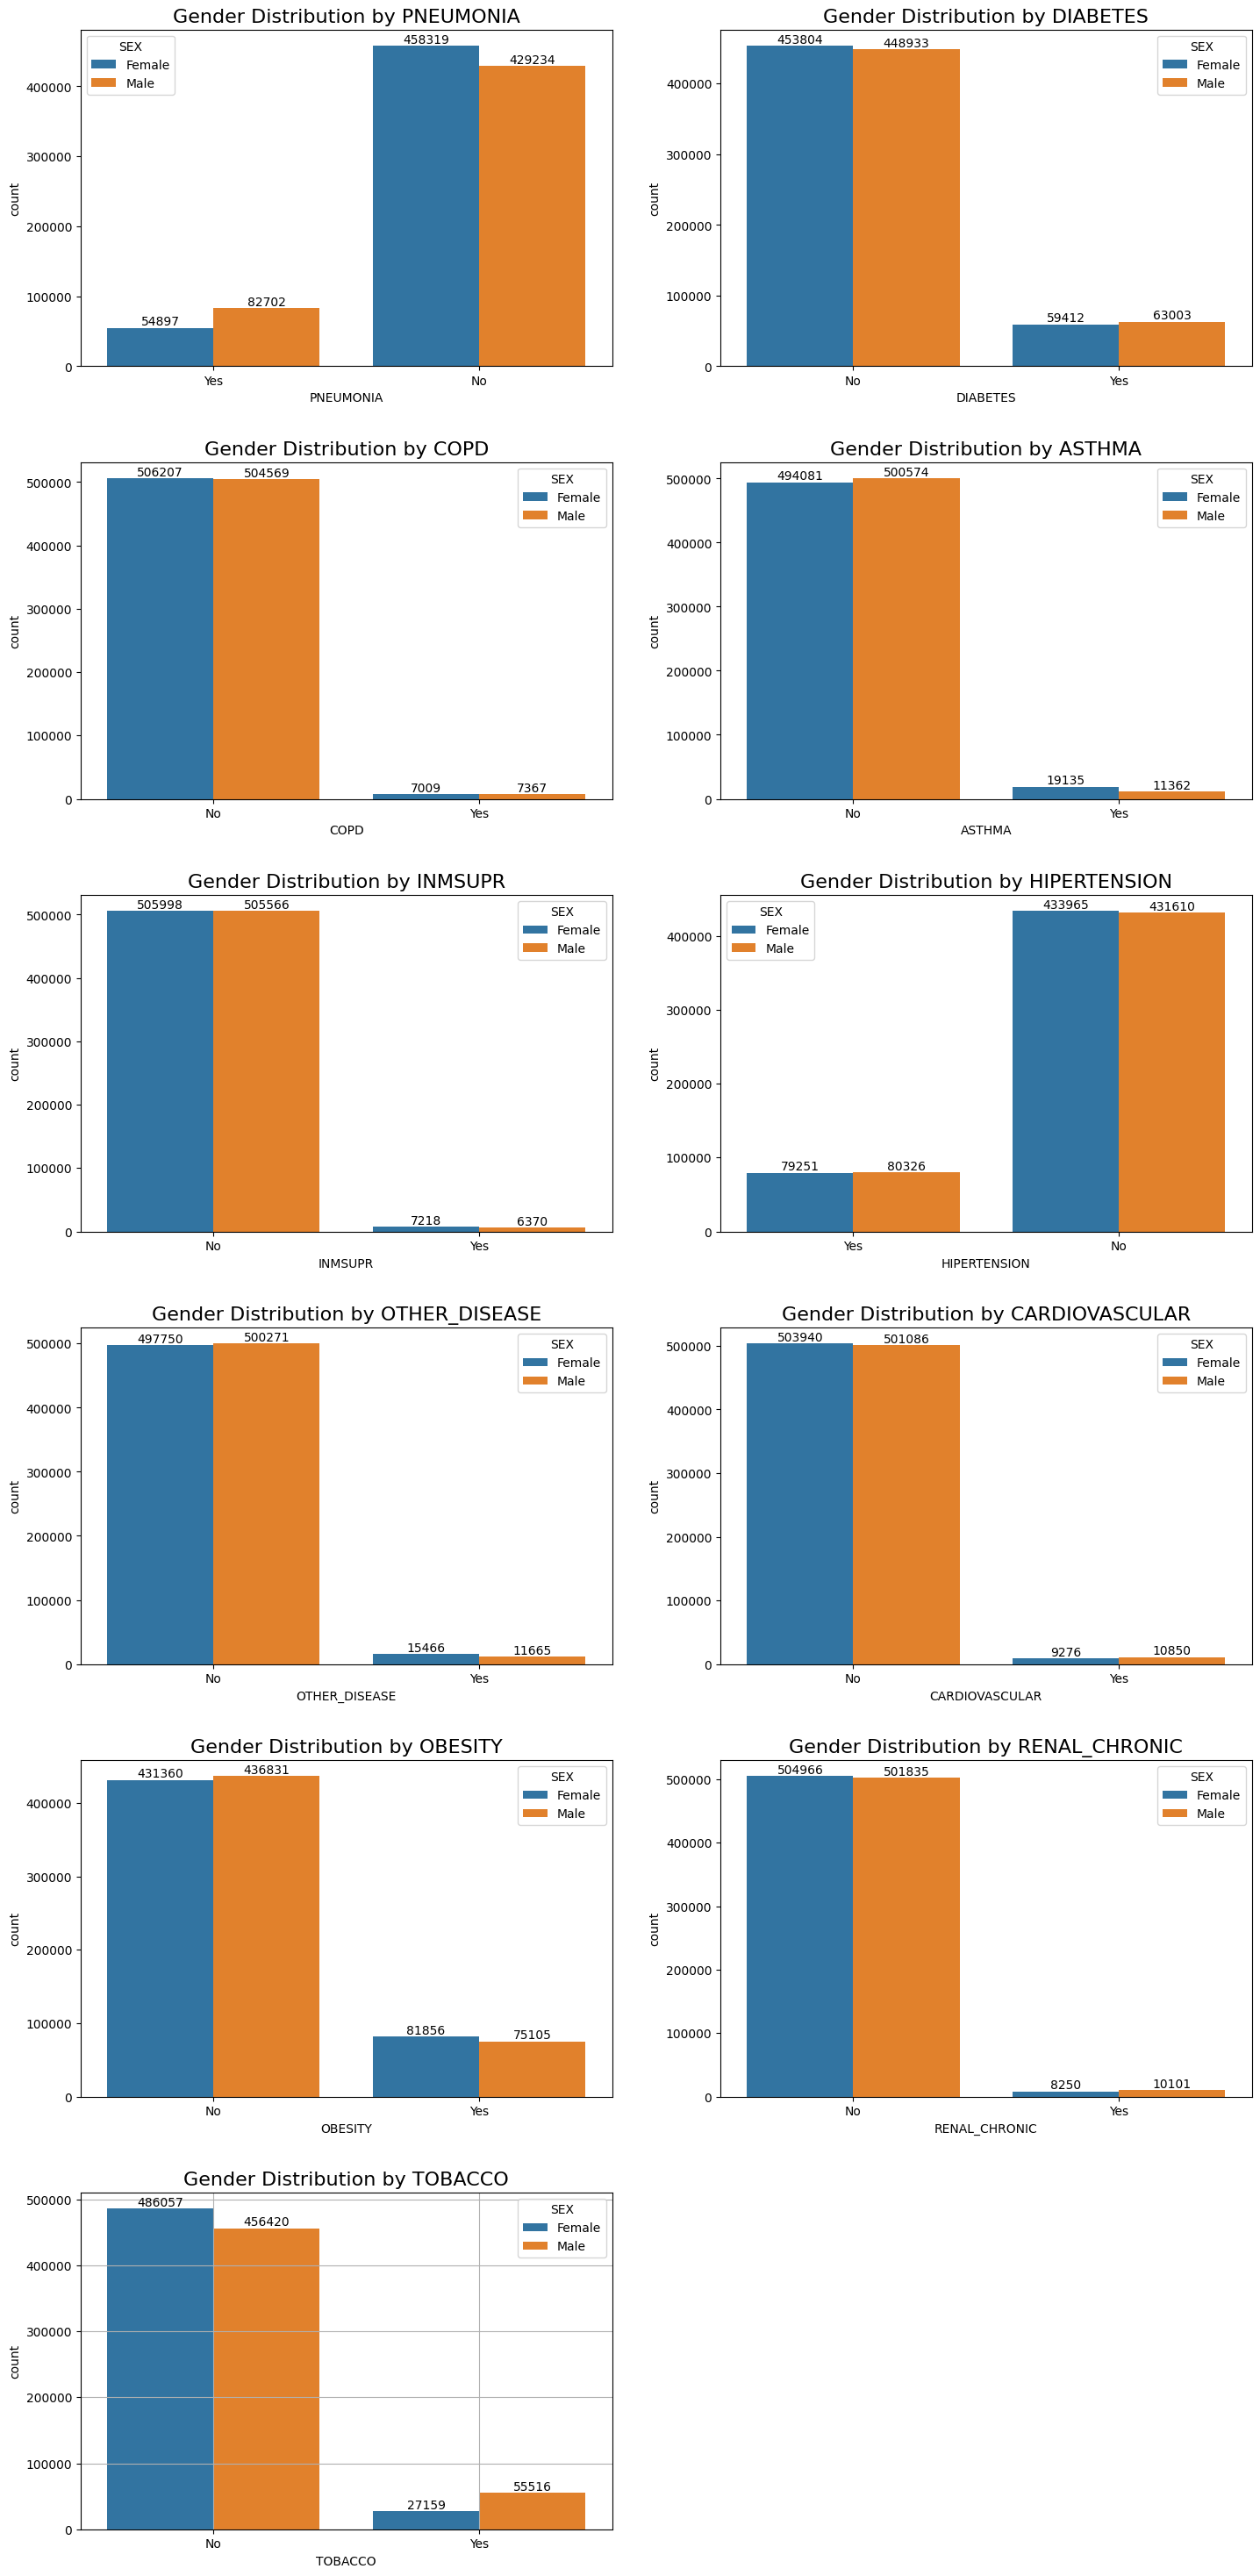

In [72]:
plt.figure(figsize=(15, 30))
for index, col in enumerate(comorbidities):
    plt.subplot((len(comorbidities) + 1) // 2, 2, index+1)
    bar = sns.countplot(data=covid_data, x=col, hue='SEX')
    for container in bar.containers:
        bar.bar_label(container)
    plt.title(f'Gender Distribution by {col}', fontsize=16)
plt.grid(True)
plt.tight_layout(pad=3)
plt.show()

## 3.3. Death Status by Comorbidities

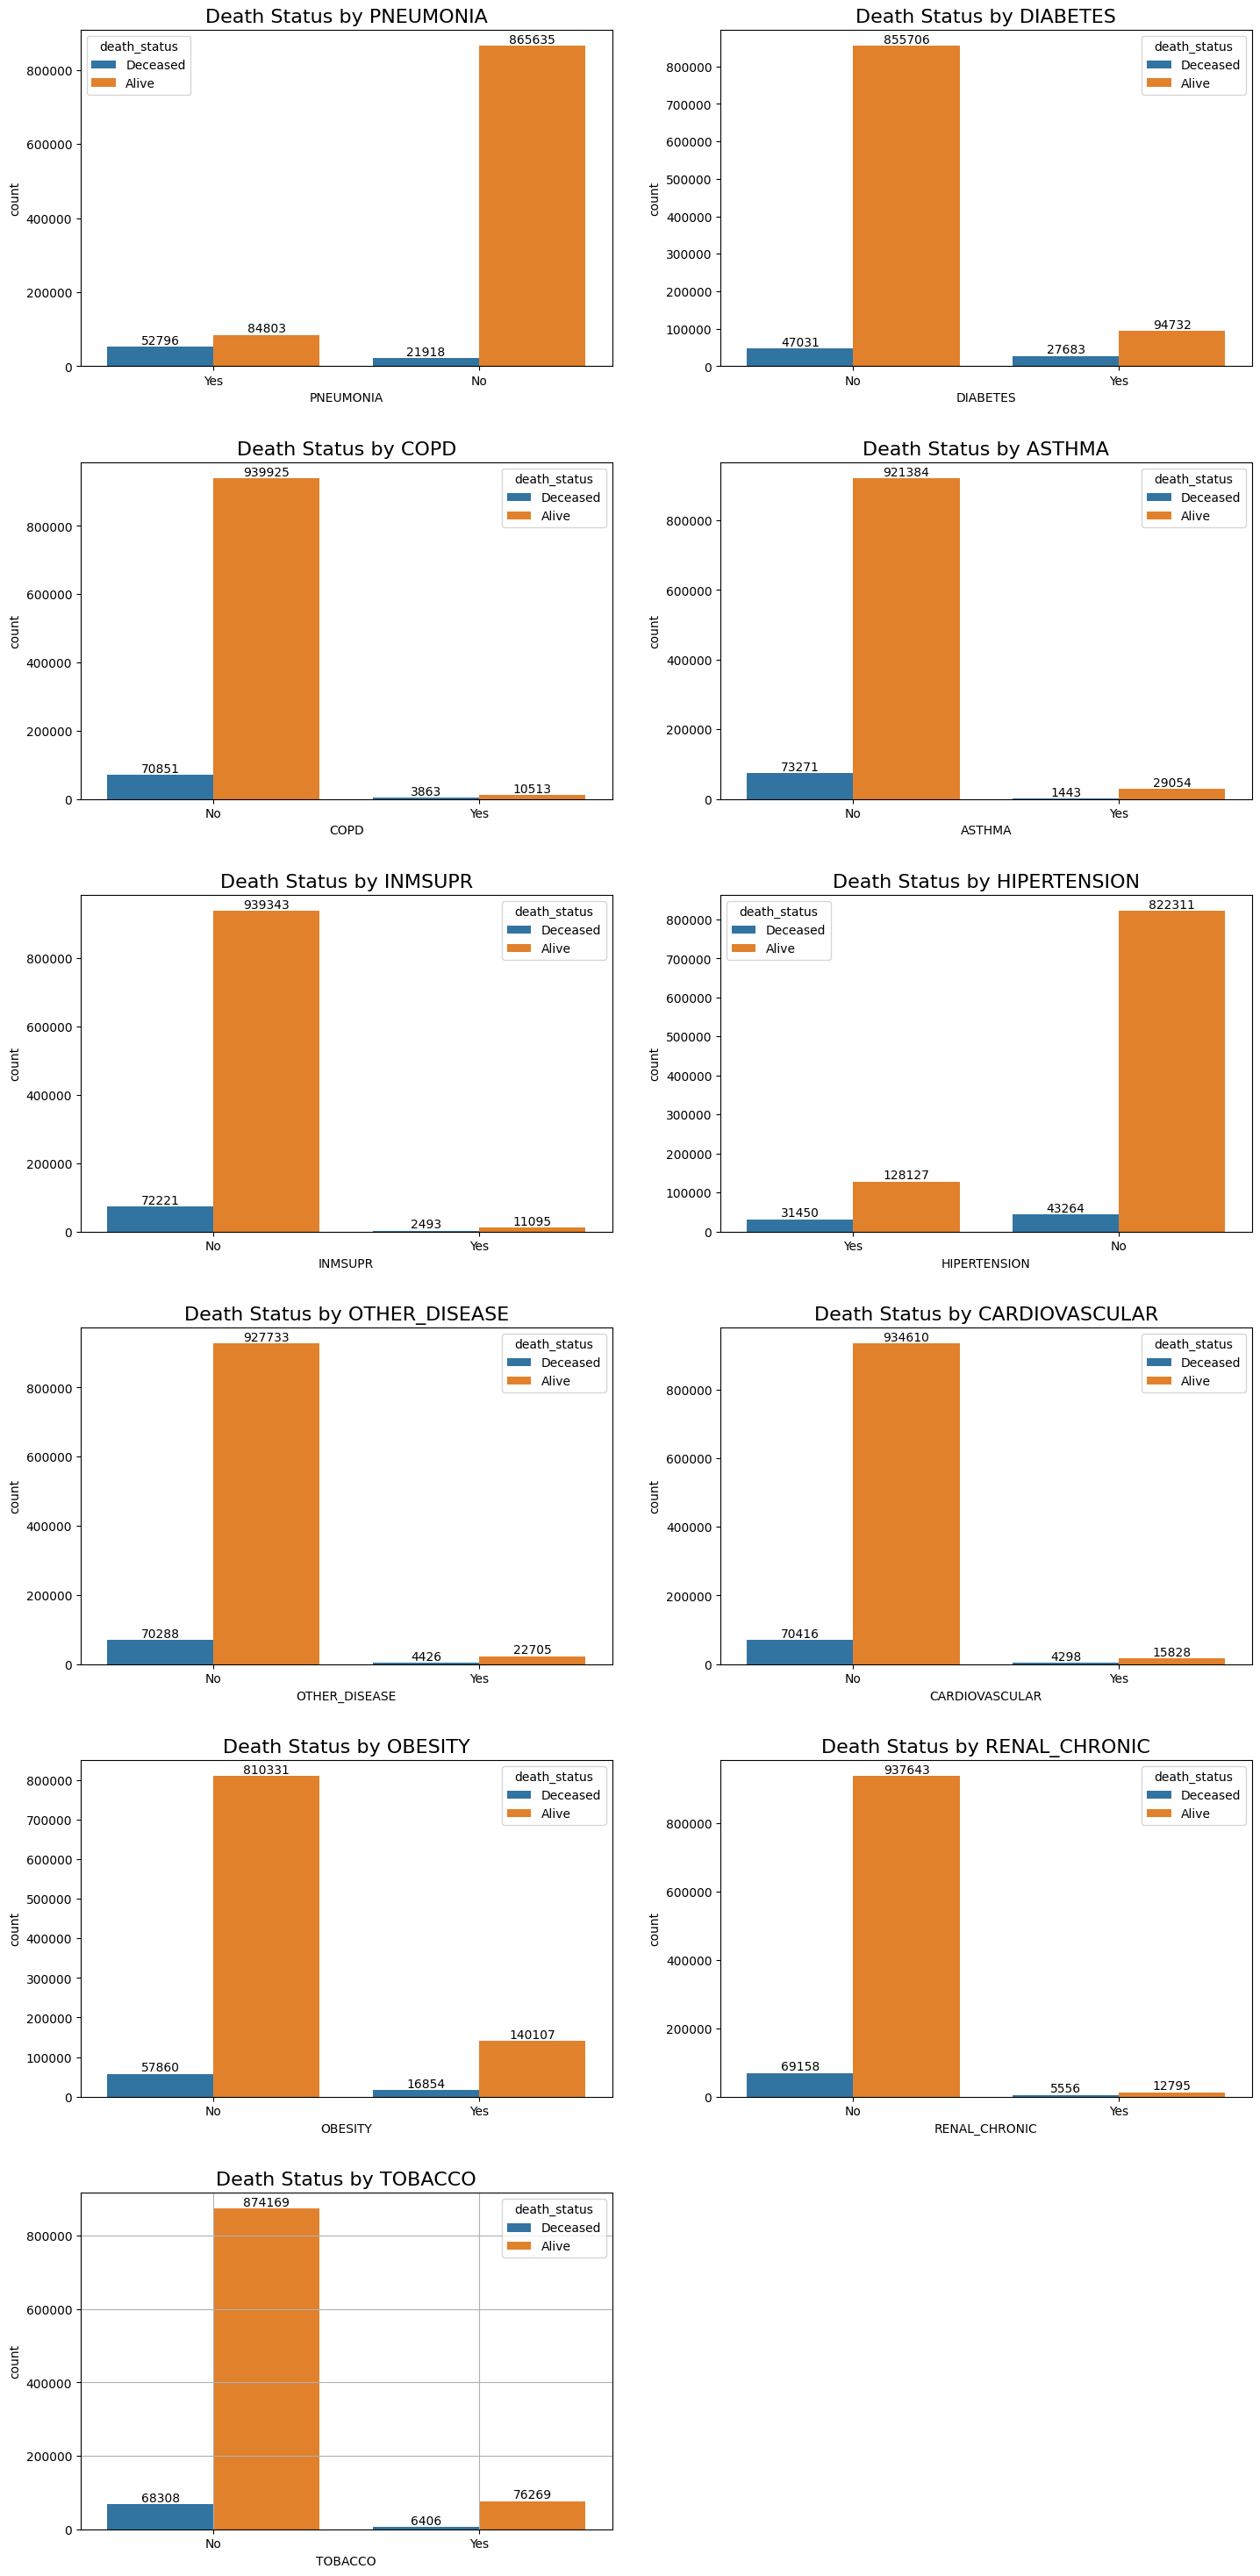

In [73]:
plt.figure(figsize=(15, 30))
for index, col in enumerate(comorbidities):
    plt.subplot((len(comorbidities) + 1) // 2, 2, index+1)
    bar = sns.countplot(data=covid_data, x=col, hue='death_status')
    for container in bar.containers:
        bar.bar_label(container)
    plt.title(f'Death Status by {col}', fontsize=16)
plt.grid(True)
plt.tight_layout(pad=3)
plt.show()

## 3.4. Most Common Comorbidities in Severe Cases

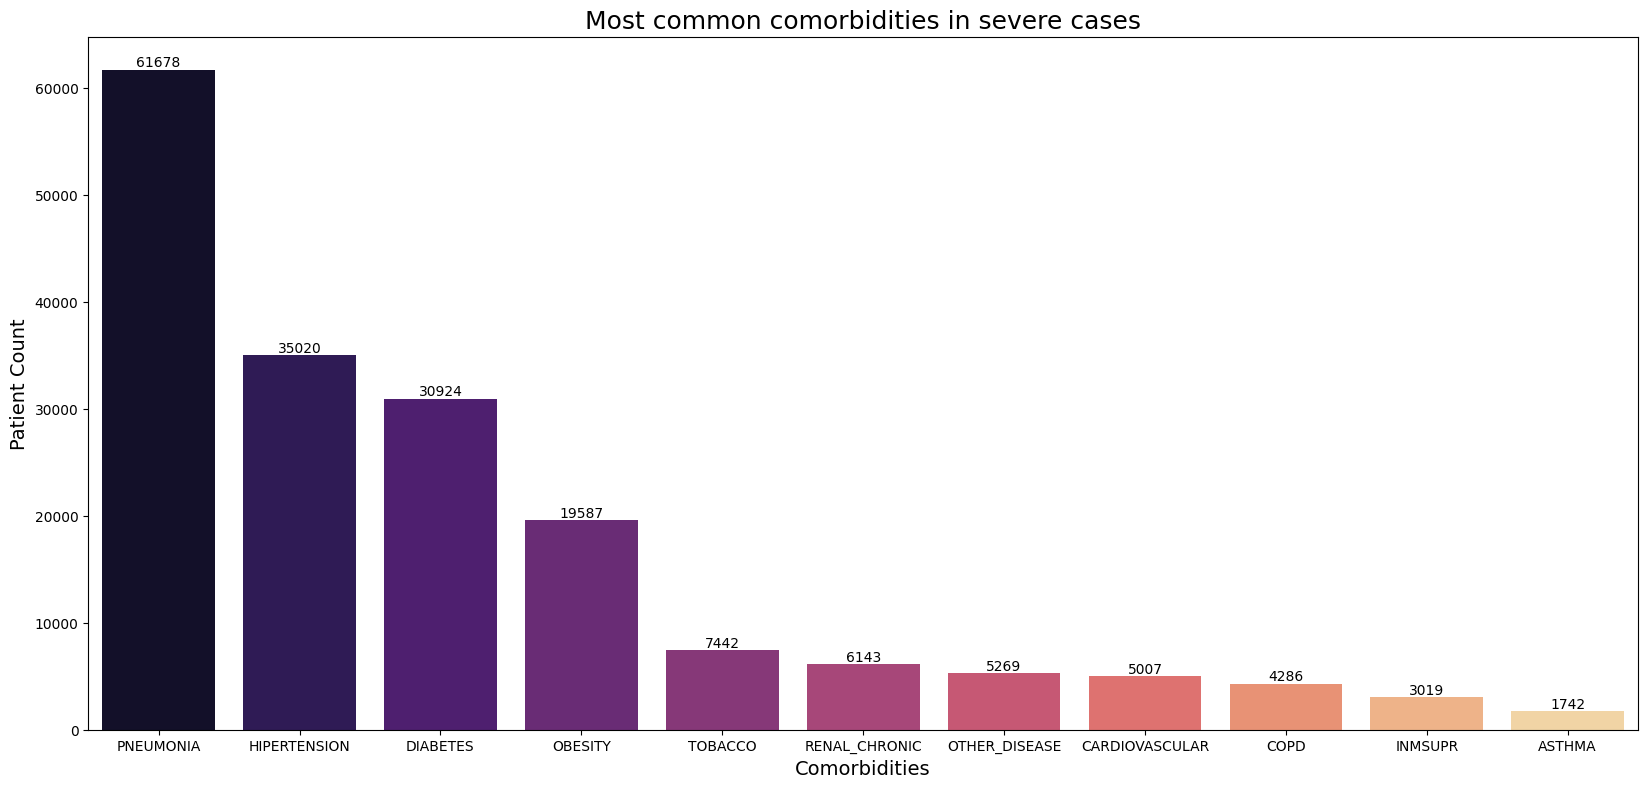

In [74]:
severe_cases = covid_data[(covid_data['ICU'] == 'Yes') | (covid_data['INTUBED'] == 'Yes') | (covid_data['death_status'] == 'Deceased')][comorbidities].apply(lambda x: (x == 'Yes').sum())

plt.figure(figsize=(20, 9))
bar = sns.barplot(data=severe_cases.sort_values(ascending=False), palette='magma')
for container in bar.containers:
    bar.bar_label(container)
plt.title('Most common comorbidities in severe cases', fontsize=18)
plt.xlabel('Comorbidities', fontsize=14)
plt.ylabel('Patient Count', fontsize=14)
plt.show()

## 3.5. Correlation Between Comorbidities and Death

In [75]:
covid_data_encoded = covid_data.copy()
covid_data_encoded

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,death_status
0,2,1,Female,Outpatient,Unknown,Yes,65,No,No,No,...,No,Yes,No,No,No,No,No,3,Unknown,Deceased
1,2,1,Male,Outpatient,Unknown,Yes,72,Unknown,No,No,...,No,Yes,No,No,Yes,Yes,No,5,Unknown,Deceased
2,2,1,Male,Hospitalized,Yes,No,55,Unknown,Yes,No,...,No,No,No,No,No,No,No,3,No,Deceased
3,2,1,Female,Outpatient,Unknown,No,53,No,No,No,...,No,No,No,No,No,No,No,7,Unknown,Deceased
4,2,1,Male,Outpatient,Unknown,No,68,Unknown,Yes,No,...,No,Yes,No,No,No,No,No,3,Unknown,Deceased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,Male,Outpatient,Unknown,No,40,Unknown,No,No,...,No,No,No,No,No,No,No,7,Unknown,Alive
1048571,1,13,Male,Hospitalized,No,No,51,Unknown,No,No,...,No,Yes,No,No,No,No,No,7,No,Alive
1048572,2,13,Male,Outpatient,Unknown,No,55,Unknown,No,No,...,No,No,No,No,No,No,No,7,Unknown,Alive
1048573,2,13,Male,Outpatient,Unknown,No,28,Unknown,No,No,...,No,No,No,No,No,No,No,7,Unknown,Alive


### 3.5.1. Encoding the Features

In [76]:
cols_to_map = [col for col in covid_data_encoded.columns if col not in ['AGE', 'USMER', 'CLASIFFICATION_FINAL', 'MEDICAL_UNIT']]

In [77]:
cols_to_map

['SEX',
 'PATIENT_TYPE',
 'INTUBED',
 'PNEUMONIA',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'ICU',
 'death_status']

In [78]:
covid_data_encoded[cols_to_map] = covid_data_encoded[cols_to_map].replace({'Yes' : 1, 'No' : 0, 'Female' : 1, 'Male' : 0, 'Hospitalized' : 2, 'Outpatient' : 1, 'Deceased' : 1, 'Alive' : 0, 'Unknown' : np.nan})

In [79]:
covid_data_encoded = covid_data_encoded.astype('Int64')

In [80]:
covid_data_encoded.isna().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 835406
PNEUMONIA                    0
AGE                          0
PREGNANT                515111
DIABETES                     0
COPD                         0
ASTHMA                       0
INMSUPR                      0
HIPERTENSION                 0
OTHER_DISEASE                0
CARDIOVASCULAR               0
OBESITY                      0
RENAL_CHRONIC                0
TOBACCO                      0
CLASIFFICATION_FINAL         0
ICU                     835564
death_status                 0
dtype: int64

In [81]:
comorbidity_df = covid_data_encoded[comorbidities + ['death_status']].copy()

In [82]:
comorbidity_df

,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,death_status
0,1,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,1,1,0,1
2,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0,0,0,0,0,0,0,0,0,0,0
1048571,0,0,0,0,0,1,0,0,0,0,0,0
1048572,0,0,0,0,0,0,0,0,0,0,0,0
1048573,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
comorbidity_df.isna().sum()

PNEUMONIA         0
DIABETES          0
COPD              0
ASTHMA            0
INMSUPR           0
HIPERTENSION      0
OTHER_DISEASE     0
CARDIOVASCULAR    0
OBESITY           0
RENAL_CHRONIC     0
TOBACCO           0
death_status      0
dtype: int64

In [84]:
comorbidity_df.shape

(1025152, 12)

In [85]:
comorbidity_df

,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,death_status
0,1,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,1,1,0,1
2,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0,0,0,0,0,0,0,0,0,0,0
1048571,0,0,0,0,0,1,0,0,0,0,0,0
1048572,0,0,0,0,0,0,0,0,0,0,0,0
1048573,0,0,0,0,0,0,0,0,0,0,0,0


### 3.5.2. Choosing the right correlation method

- **Checking the balance status of the classes**

In [86]:
for col in comorbidities:
    print(covid_data_encoded[col].value_counts())
    print('*********************************\n')

PNEUMONIA
0    887553
1    137599
Name: count, dtype: Int64
*********************************

DIABETES
0    902737
1    122415
Name: count, dtype: Int64
*********************************

COPD
0    1010776
1      14376
Name: count, dtype: Int64
*********************************

ASTHMA
0    994655
1     30497
Name: count, dtype: Int64
*********************************

INMSUPR
0    1011564
1      13588
Name: count, dtype: Int64
*********************************

HIPERTENSION
0    865575
1    159577
Name: count, dtype: Int64
*********************************

OTHER_DISEASE
0    998021
1     27131
Name: count, dtype: Int64
*********************************

CARDIOVASCULAR
0    1005026
1      20126
Name: count, dtype: Int64
*********************************

OBESITY
0    868191
1    156961
Name: count, dtype: Int64
*********************************

RENAL_CHRONIC
0    1006801
1      18351
Name: count, dtype: Int64
*********************************

TOBACCO
0    942477
1     82675
Name: c

- **We can observe that the columns are highly imbalanced.** <br>
- **We will use Matthews Correlation Coefficient (MCC) for binary features which is better when the dataset is imbalanced (one class is much more frequent) and suitable for binary vs binary correlation.**

In [87]:
from sklearn.metrics import matthews_corrcoef

comorbidity_death_corr = {}
for col in comorbidities:
    if col != 'death_status':
        comorbidity_death_corr[col] = matthews_corrcoef(comorbidity_df[col], comorbidity_df['death_status'])

comorbidity_death_corr_df = pd.DataFrame.from_dict(comorbidity_death_corr, orient='index', columns=['MCC'])
comorbidity_death_corr_df = comorbidity_death_corr_df.sort_values(by='MCC', ascending=False)
print(comorbidity_death_corr_df)

                     MCC
PNEUMONIA       0.470800
DIABETES        0.217115
HIPERTENSION    0.205158
RENAL_CHRONIC   0.119396
COPD            0.089846
CARDIOVASCULAR  0.076582
OTHER_DISEASE   0.057247
OBESITY         0.056427
INMSUPR         0.049308
TOBACCO         0.005245
ASTHMA         -0.017221


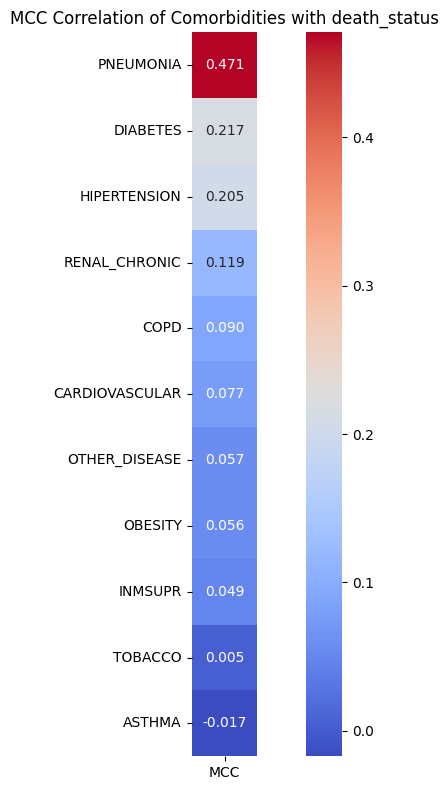

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(comorbidity_death_corr_df, annot=True, cmap='coolwarm', fmt='.3f', cbar=True, square=True)
plt.title("MCC Correlation of Comorbidities with death_status")
plt.tight_layout()
plt.show()

### Strong positive correlations with `death_status`:  
  - **PNEUMONIA (0.471)**: Higher intubation correlates with a higher likelihood of death.  
  - **DIABETES (0.217)** and **HIPERTENSION (0.205)** and **RENAL_CHRONIC(0.119)**: Increase the risk of death, but to a lesser extent.
  
### Moderate correlations:  
  - **COPD (0.09)**, **CARDIOVASCULAR (0.077)**: Slight increase in death risk.

### Weak positive correlations:  
  - **OTHER_DISEASE (0.057)**, **OBESITY (0.056)**, **INMSUPR (0.049)**.

### Negligible or weak negative correlations:  
  - **TOBACCO (0.005)**, **ASTHMA (-0.017)**.

### Key takeaway: 
**PNEUMONIA**, **DIABETES**, **HIPERTENSION** and **RENAL_CHRONIC** are the strongest factors associated with death, while **TOBACCO**, and **ASTHMA** have minimal impact.

## 3.6. Relationship between Tobacco use and Severity of Case

In [89]:
severity_indicators = ['ICU', 'INTUBED', 'death_status']
tobacco_to_severity_df = covid_data_encoded[severity_indicators + ['TOBACCO']].copy()

In [90]:
tobacco_to_severity_df

,ICU,INTUBED,death_status,TOBACCO
0,<NA>,<NA>,1,0
1,<NA>,<NA>,1,0
2,0,1,1,0
3,<NA>,<NA>,1,0
4,<NA>,<NA>,1,0
...,...,...,...,...
1048570,<NA>,<NA>,0,0
1048571,0,0,0,0
1048572,<NA>,<NA>,0,0
1048573,<NA>,<NA>,0,0


In [91]:
tobacco_to_severity_df.isna().sum()

ICU             835564
INTUBED         835406
death_status         0
TOBACCO              0
dtype: int64

In [92]:
tobacco_to_severity_df = tobacco_to_severity_df.dropna()

In [93]:
tobacco_to_severity_df.isna().sum()

ICU             0
INTUBED         0
death_status    0
TOBACCO         0
dtype: int64

In [94]:
tobacco_to_severity_df.dtypes

ICU             Int64
INTUBED         Int64
death_status    Int64
TOBACCO         Int64
dtype: object

In [95]:
tobacco_to_severity_df = tobacco_to_severity_df.astype('int64')

In [96]:
tobacco_to_severity_df

,ICU,INTUBED,death_status,TOBACCO
2,0,1,1,0
5,0,0,0,0
8,0,0,0,0
9,0,0,0,0
11,0,0,0,0
...,...,...,...,...
1048553,0,0,0,0
1048554,0,0,0,0
1048567,0,0,0,0
1048569,0,0,0,0


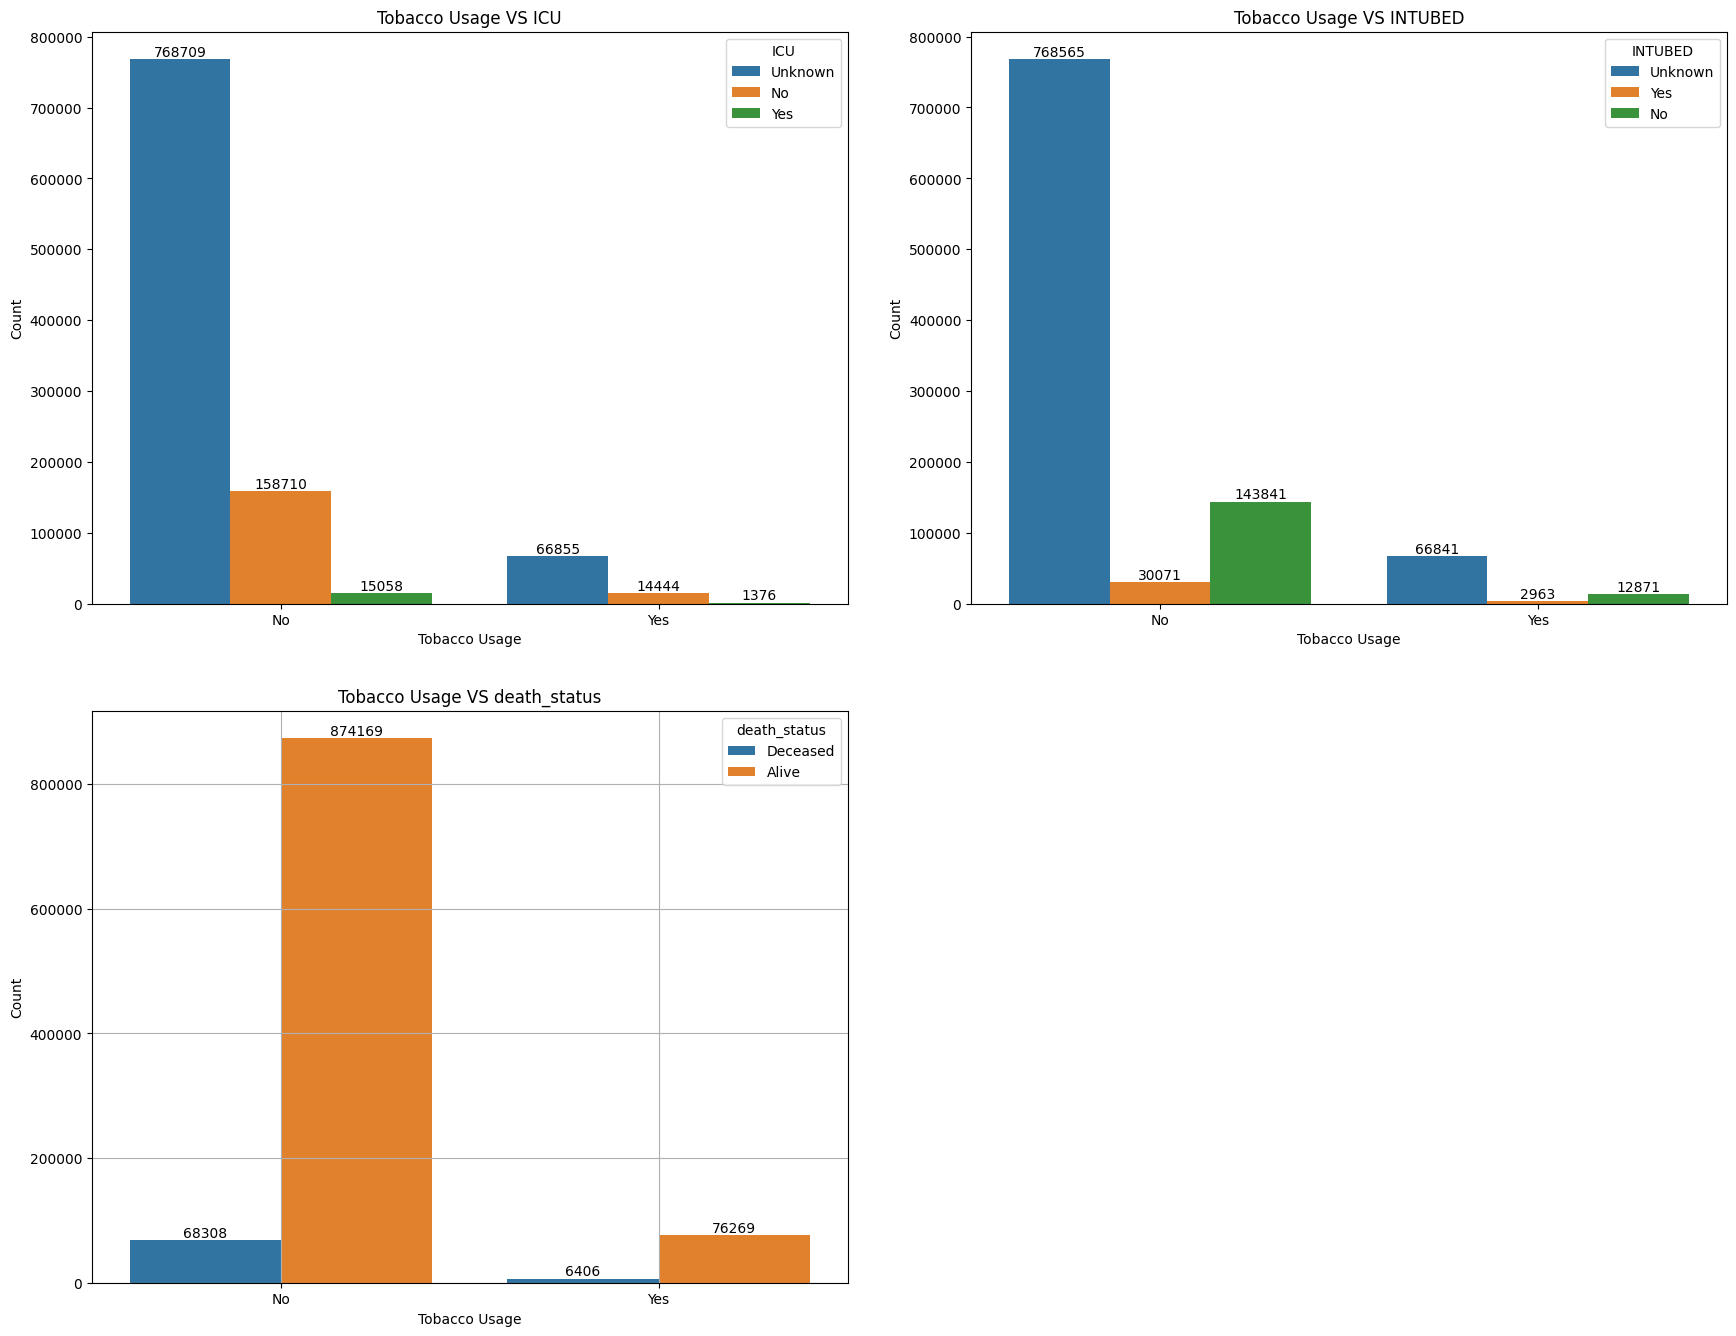

In [97]:
plt.figure(figsize=(18, 14))

for index, indicator in enumerate(severity_indicators):
    plt.subplot(2, 2, index+1)
    bar = sns.countplot(data=covid_data, x='TOBACCO', hue=indicator)
    for container in bar.containers:
        bar.bar_label(container)
        
    plt.xlabel('Tobacco Usage')
    plt.ylabel('Count')
    plt.title(f'Tobacco Usage VS {indicator}')
    # plt.legend(title='ICU Status')
plt.grid(True)
plt.tight_layout(pad=3)
plt.show()


In [98]:
tobacco_severity_corr = {}

for col in severity_indicators:
    tobacco_severity_corr[col] = matthews_corrcoef(tobacco_to_severity_df['TOBACCO'], tobacco_to_severity_df[col])

tobacco_severity_corr_df = pd.DataFrame.from_dict(tobacco_severity_corr, orient='index', columns=['corr with tobacco usage'])
tobacco_severity_corr_df

,corr with tobacco usage
ICU,0.000316
INTUBED,0.010456
death_status,0.009621


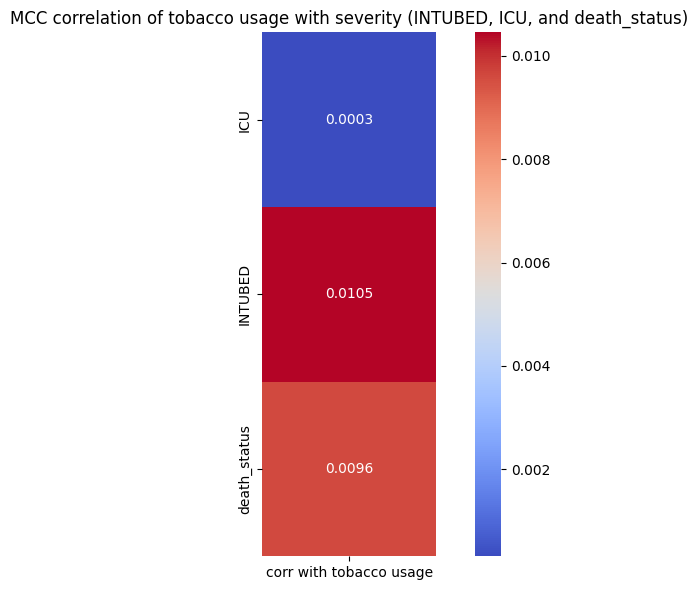

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=tobacco_severity_corr_df, annot=True, cmap='coolwarm', cbar=True, square=True, fmt='.4f')
plt.title('MCC correlation of tobacco usage with severity (INTUBED, ICU, and death_status)')
plt.tight_layout()
plt.show()

- **The MCC correlation of tobacco usage with severity cases like `INTUBED`, `ICU` and `death_status` are negligible as observed above.** <br>
- **This concludes that the tobacco usage does not have significant impact on the severity as per above heatmap projection.**

# 4. COVID Classifications and Outcomes

## 4.1. COVID Classification Distribution

In [100]:
covid_data['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
7    490123
3    378629
6    117756
5     25305
1      8448
4      3090
2      1801
Name: count, dtype: int64

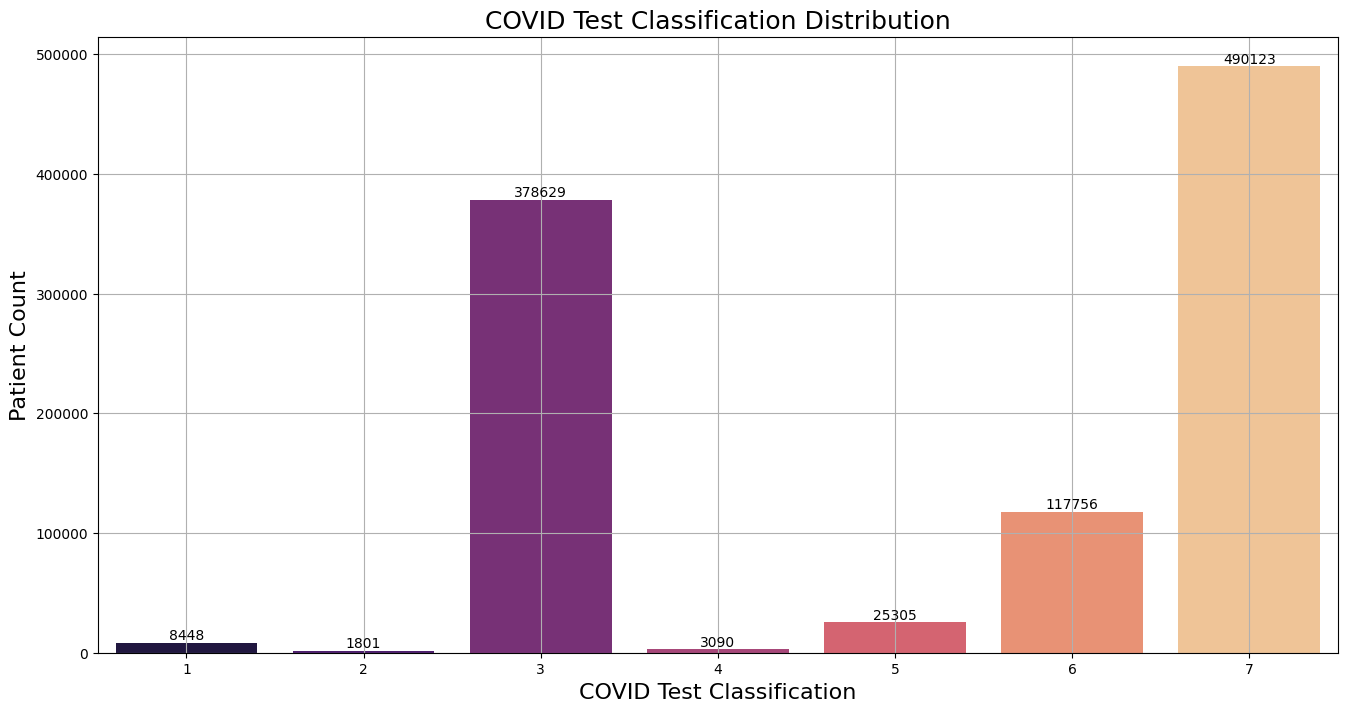

In [101]:
plt.figure(figsize=(16,8))
count_bar = sns.barplot(data=covid_data['CLASIFFICATION_FINAL'].value_counts(), palette='magma')

for container in count_bar.containers:
    count_bar.bar_label(container)

plt.title('COVID Test Classification Distribution', fontsize=18)
plt.xlabel('COVID Test Classification', fontsize=16)
plt.ylabel('Patient Count', fontsize=16)
plt.grid(True)


### Classification
- **Values 1-3 mean that the patient was diagnosed with covid in different degrees.** <br>
- **4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.**

## 4.2. Dead VS Survived

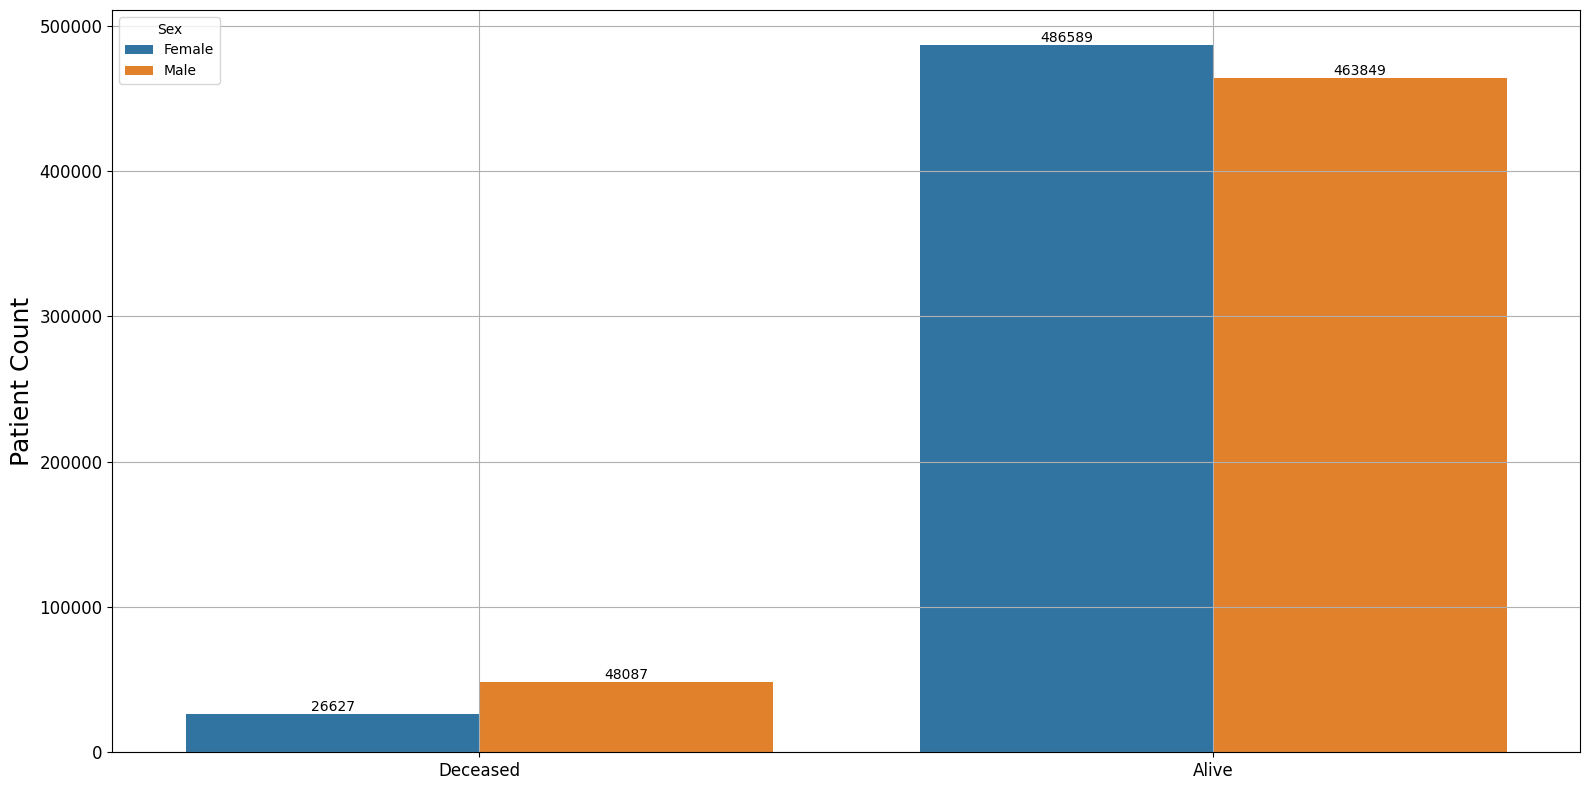

In [102]:
count_plot(x='death_status', hue='SEX', legend_title='Sex')

## 4.3. Impact of Age on Mortality

In [103]:
age_death = covid_data[['AGE', 'death_status']]

age_death = age_death.replace({'Deceased' : 1, 'Alive' : 1})


- The **Point-Biserial Correlation (0.3224)** indicates a **moderate positive correlation** between **age** and **mortality**. This suggests that **older individuals have a higher likelihood of death** due to COVID-19.  
- The **p-value (0.0000)** confirms that this correlation is **statistically significant**, meaning the relationship is **unlikely due to chance**.  
- In summary, **age plays a significant role in COVID-19 mortality, with older patients being more at risk.**

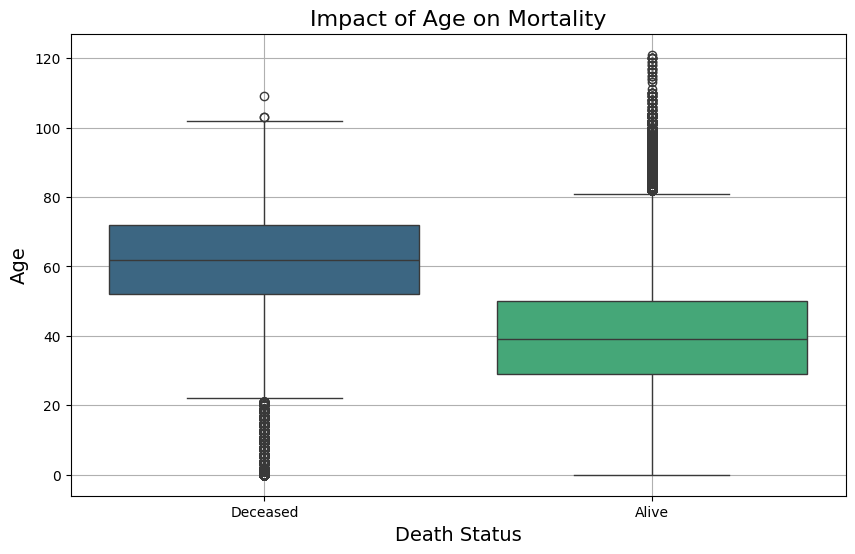

In [176]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=covid_data['death_status'], y=covid_data['AGE'], palette='viridis')
plt.title('Impact of Age on Mortality', fontsize=16)
plt.xlabel('Death Status', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True)
plt.show()


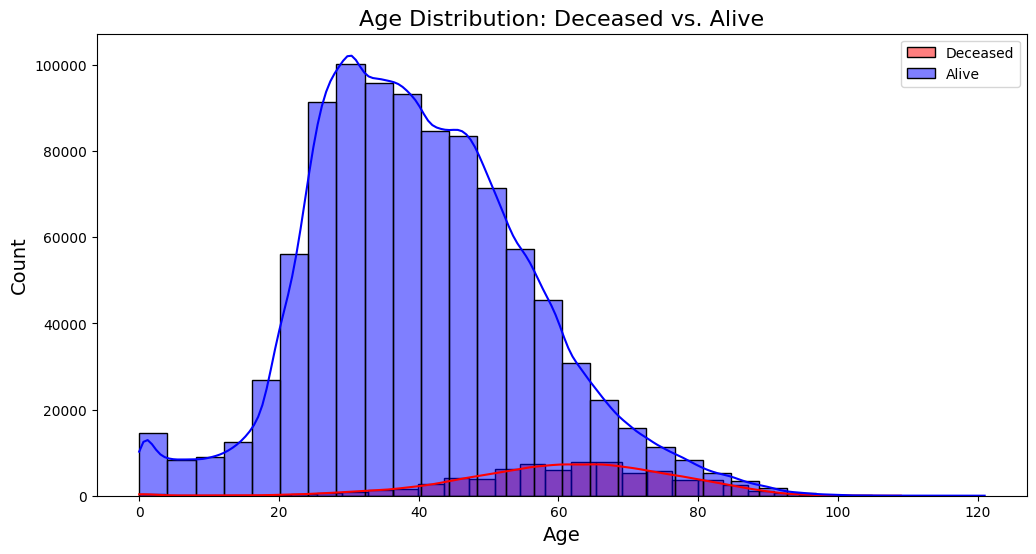

In [105]:
plt.figure(figsize=(12, 6))
sns.histplot(covid_data[covid_data['death_status'] == 'Deceased']['AGE'], bins=30, kde=True, color='red', label='Deceased')
sns.histplot(covid_data[covid_data['death_status'] == 'Alive']['AGE'], bins=30, kde=True, color='blue', label='Alive')
plt.title('Age Distribution: Deceased vs. Alive', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()


## 4.4. Mortality Distribution by Medical Units

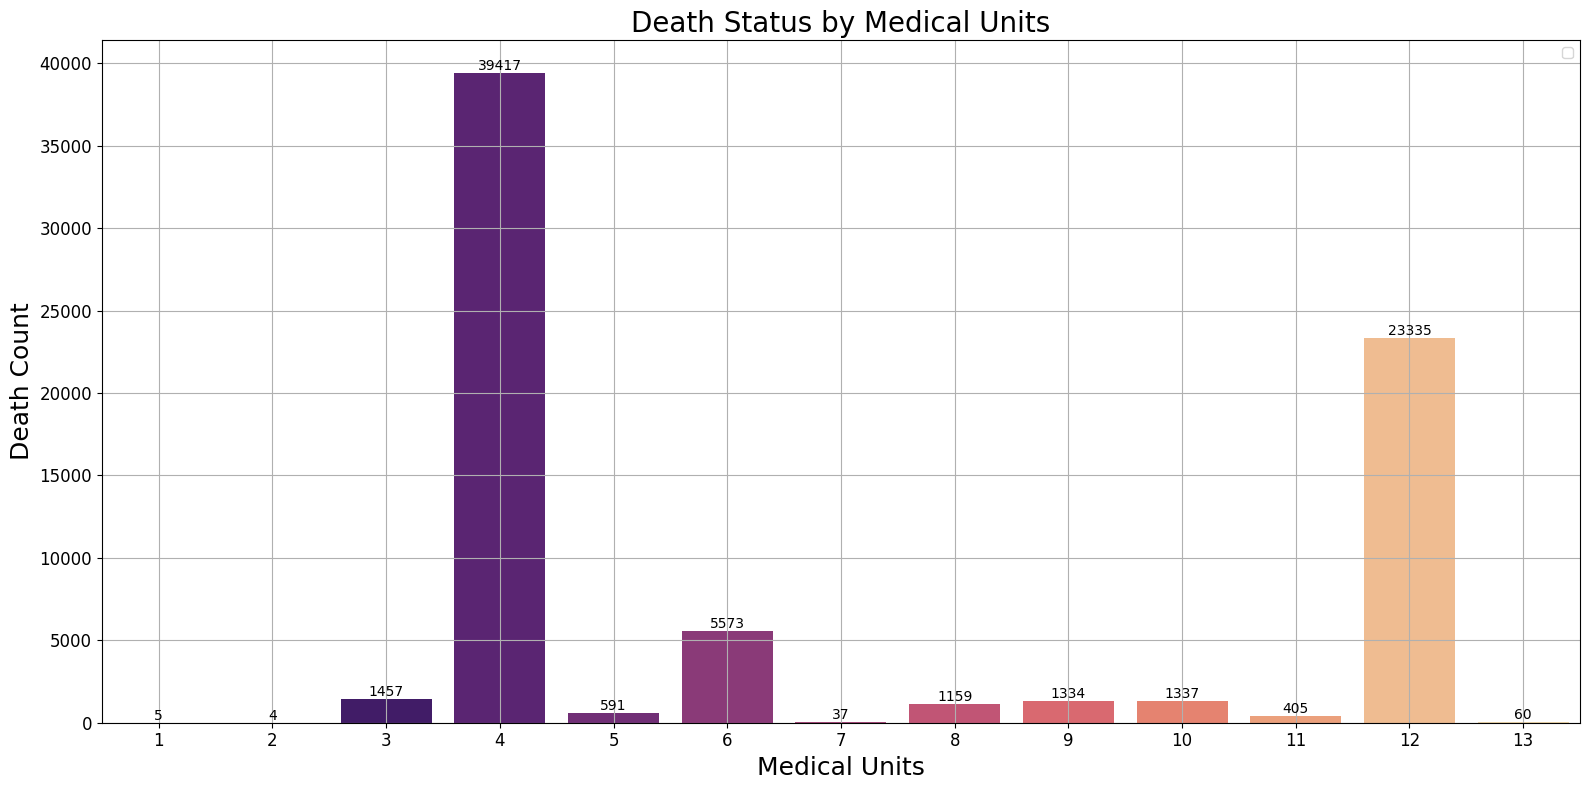

In [106]:
death_status_medical_units = covid_data[covid_data['death_status'] == 'Deceased']['MEDICAL_UNIT']

# sorted_medical_units = death_status_medical_units.value_counts().sort_values(ascending=False)
count_plot(x=death_status_medical_units, title='Death Status by Medical Units', xlabel='Medical Units', ylabel='Death Count', palette='magma')

# 5. ICU and Intubation Analysis

## 5.1. Age Distribution of ICU Patients

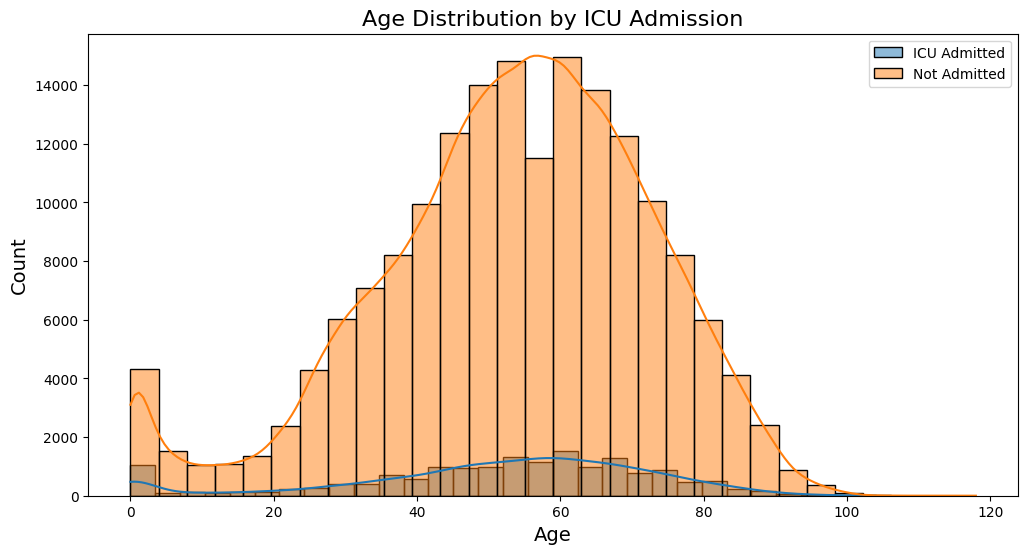

In [107]:
plt.figure(figsize=(12, 6))
sns.histplot(covid_data[covid_data['ICU'] == 'Yes']['AGE'], bins=30, kde=True, label='ICU Admitted')
sns.histplot(covid_data[covid_data['ICU'] == 'No']['AGE'], bins=30, kde=True, label='Not Admitted')
plt.title('Age Distribution by ICU Admission', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()


## 5.2. Mortality among ICU Patients

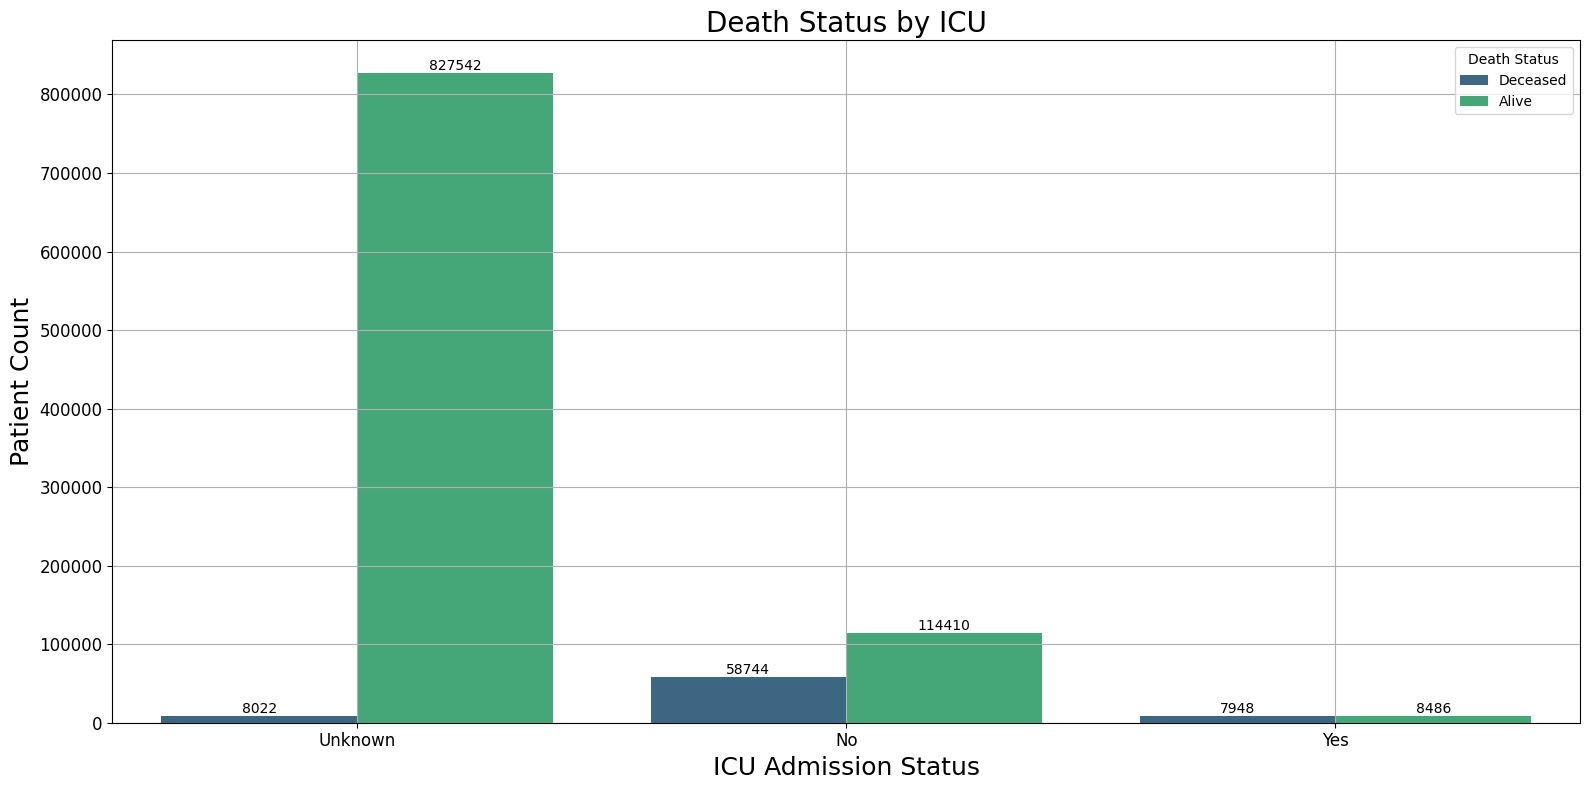

In [108]:
count_plot(x='ICU', title='Death Status by ICU', hue='death_status', xlabel='ICU Admission Status', palette='viridis', legend_title='Death Status')

## 5.3. Survival in Intubated Patients

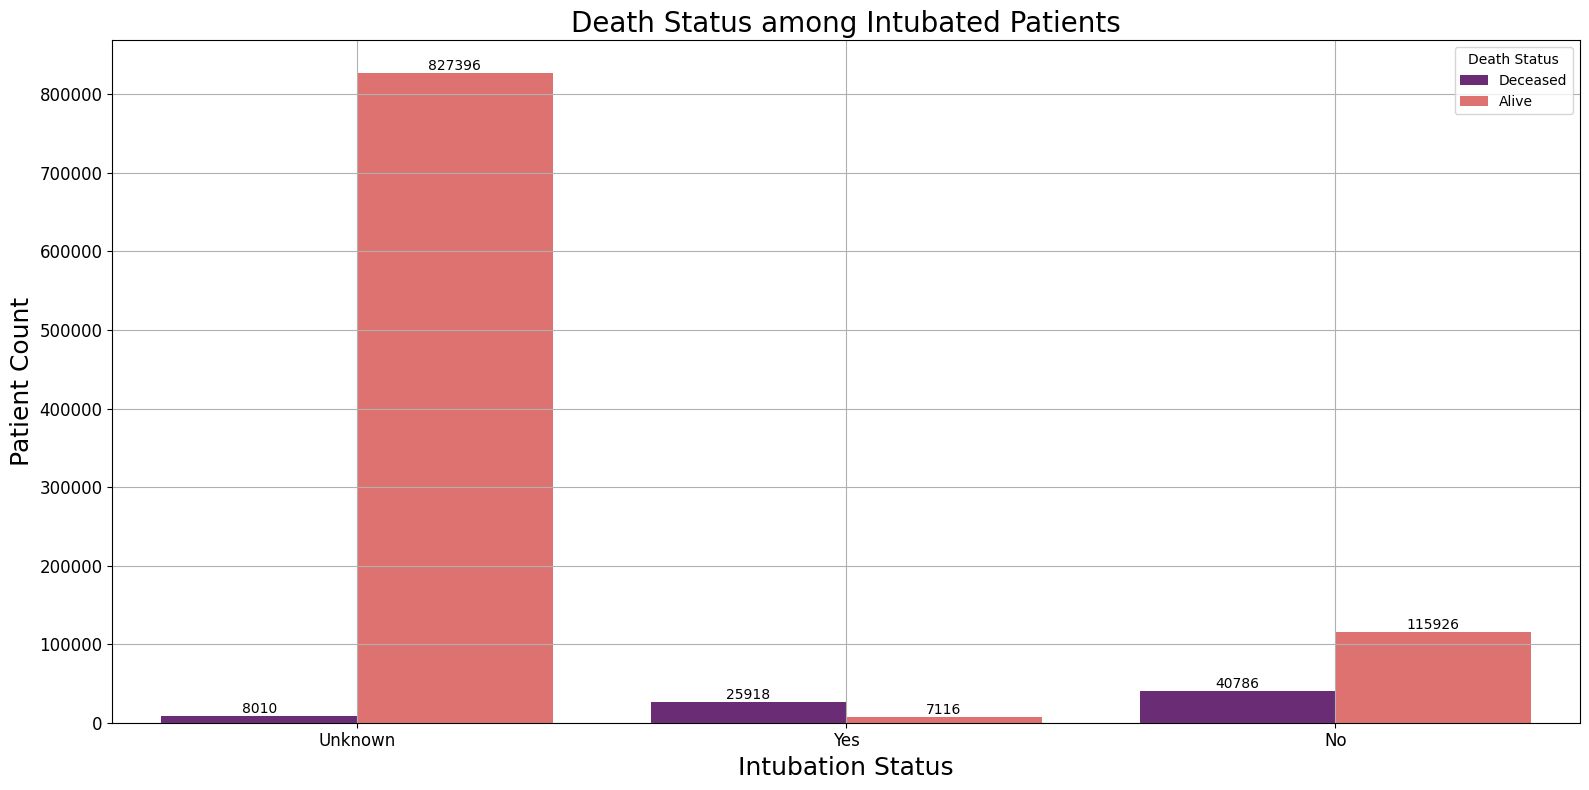

In [109]:
count_plot(x='INTUBED', title='Death Status among Intubated Patients', hue='death_status', xlabel='Intubation Status', palette='magma', legend_title='Death Status')

## 5.4. Factors Linked to ICU Admission

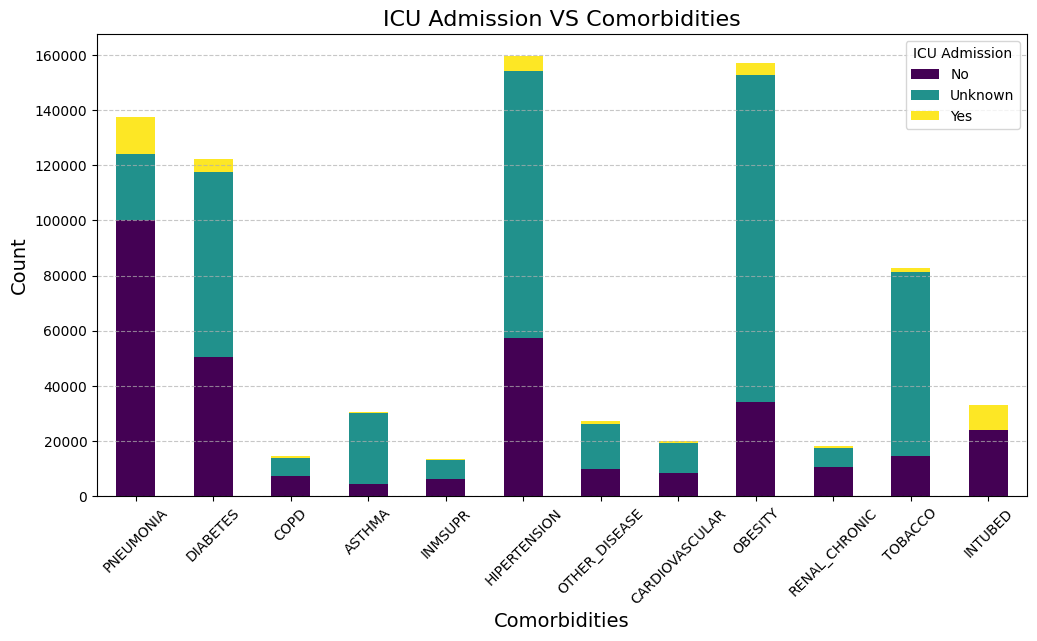

In [110]:
icu_comorbidity_counts = covid_data.groupby('ICU')[comorbidities + ['INTUBED']].apply(lambda x: (x == 'Yes').sum())

icu_comorbidity_counts.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('ICU Admission VS Comorbidities', fontsize=16)
plt.xlabel('Comorbidities', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='ICU Admission')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## 5.5. Correlation Between Comorbidities and ICU Admission

In [111]:
comorbidities_to_icu_df = covid_data_encoded[comorbidities + ['ICU']].copy()

In [112]:
comorbidities_to_icu_df.shape

(1025152, 12)

In [113]:
comorbidities_to_icu_df.isna().sum()

PNEUMONIA              0
DIABETES               0
COPD                   0
ASTHMA                 0
INMSUPR                0
HIPERTENSION           0
OTHER_DISEASE          0
CARDIOVASCULAR         0
OBESITY                0
RENAL_CHRONIC          0
TOBACCO                0
ICU               835564
dtype: int64

In [114]:
comorbidities_to_icu_df = comorbidities_to_icu_df.dropna()

In [115]:
comorbidities_to_icu_df.isna().sum()

PNEUMONIA         0
DIABETES          0
COPD              0
ASTHMA            0
INMSUPR           0
HIPERTENSION      0
OTHER_DISEASE     0
CARDIOVASCULAR    0
OBESITY           0
RENAL_CHRONIC     0
TOBACCO           0
ICU               0
dtype: int64

In [116]:
icu_to_comorbidities_corr = {}
for col in comorbidities:
    icu_to_comorbidities_corr[col] = matthews_corrcoef(comorbidities_to_icu_df[col], comorbidities_to_icu_df['ICU'])

icu_to_comorbidities_corr_df = pd.DataFrame.from_dict(icu_to_comorbidities_corr, orient='index', columns=['MCC']).sort_values(by='MCC', ascending=False)
print(icu_to_comorbidities_corr_df)

                     MCC
PNEUMONIA       0.141772
OBESITY         0.036452
CARDIOVASCULAR  0.013367
DIABETES        0.007790
INMSUPR         0.006244
OTHER_DISEASE   0.001232
TOBACCO         0.000317
HIPERTENSION   -0.000027
ASTHMA         -0.003616
COPD           -0.007095
RENAL_CHRONIC  -0.012996


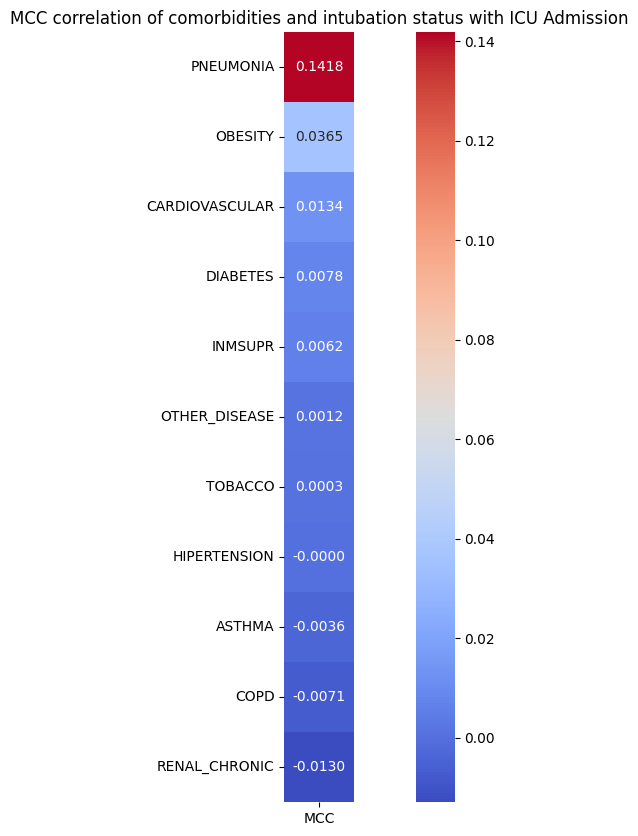

In [117]:
plt.figure(figsize=(16, 10))
sns.heatmap(data=icu_to_comorbidities_corr_df, annot=True, cmap='coolwarm', cbar=True, square=True, fmt='.4f')
plt.title('MCC correlation of comorbidities and intubation status with ICU Admission')

plt.show()


- **Pneumonia (0.1418)** has the strongest positive correlation with ICU admission, indicating a significant association.  
- **Obesity (0.0365)** and **cardiovascular disease (0.0134)** show weak positive correlations, suggesting minor influence.  
- **Diabetes (0.0078), immunosuppression (0.0062), and other diseases (0.0012)** have negligible correlation with ICU admission.  
- **Hypertension (-0.00003), asthma (-0.0036), COPD (-0.0071), and renal chronic disease (-0.0130)** have near-zero or weak negative correlations, indicating little to no direct impact on ICU admission.  

🔹 **Key Insight:** Pneumonia is the strongest predictor for ICU admission, while other comorbidities show minimal correlation.

# 6. Hospitalization VS Home Recovery

## 6.1. Mortality in Hospitalized VS Outpatients

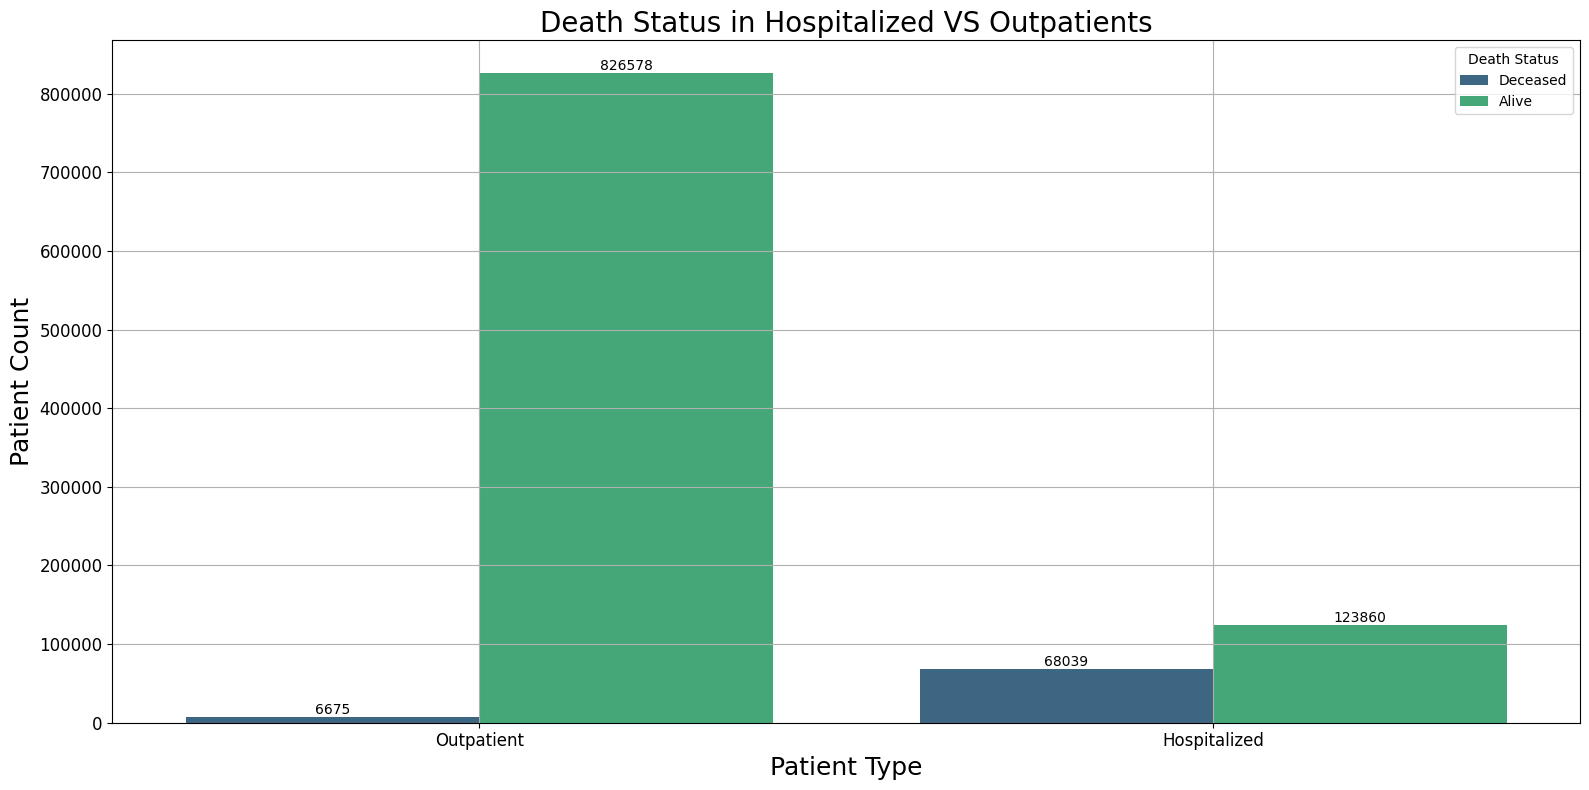

In [118]:
count_plot(x='PATIENT_TYPE', hue='death_status', title='Death Status in Hospitalized VS Outpatients', xlabel='Patient Type', legend_title='Death Status', palette='viridis')

## 5.2. Survival VS Mortality in Hospitalized and Outpatients

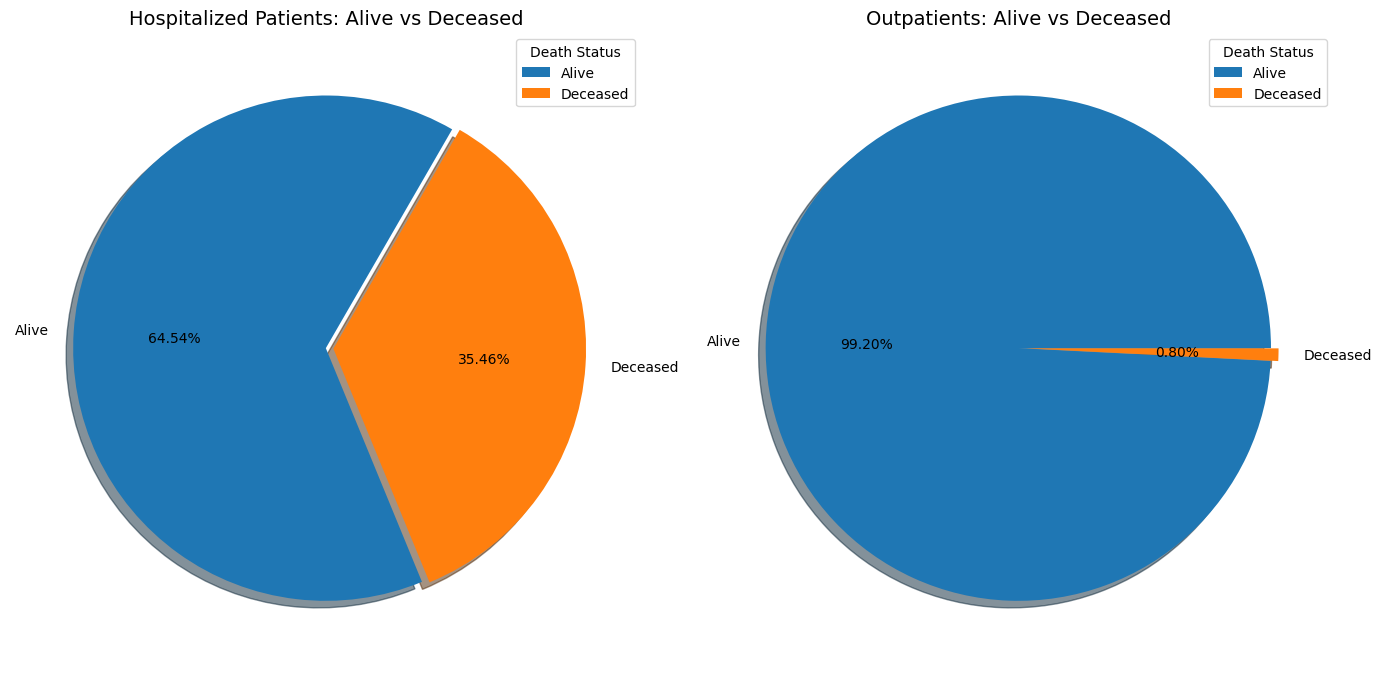

In [119]:
hospitalized_counts = covid_data[covid_data['PATIENT_TYPE'] == 'Hospitalized']['death_status'].value_counts()
outpatient_counts = covid_data[covid_data['PATIENT_TYPE'] == 'Outpatient']['death_status'].value_counts()

plt.figure(figsize=(14, 14))

plt.subplot(2, 2, 1)
plt.pie(x=hospitalized_counts, autopct='%.2f%%', labels=hospitalized_counts.index, explode=[0, 0.03], startangle=60, shadow=True)
plt.title("Hospitalized Patients: Alive vs Deceased", fontsize=14)
plt.legend(title='Death Status')

plt.subplot(2, 2, 2)
plt.pie(x=outpatient_counts, autopct='%.2f%%', labels=outpatient_counts.index, explode=[0, 0.03], startangle=0, shadow=True)
plt.title("Outpatients: Alive vs Deceased", fontsize=14)
plt.legend(title='Death Status')

plt.tight_layout()
plt.show()

## 5.3. Most Common Conditions in Hospitalized Patients

In [120]:
conditions_in_hospitalized = covid_data[covid_data['PATIENT_TYPE'] == 'Hospitalized'][comorbidities].apply(lambda x : (x == 'Yes').sum())

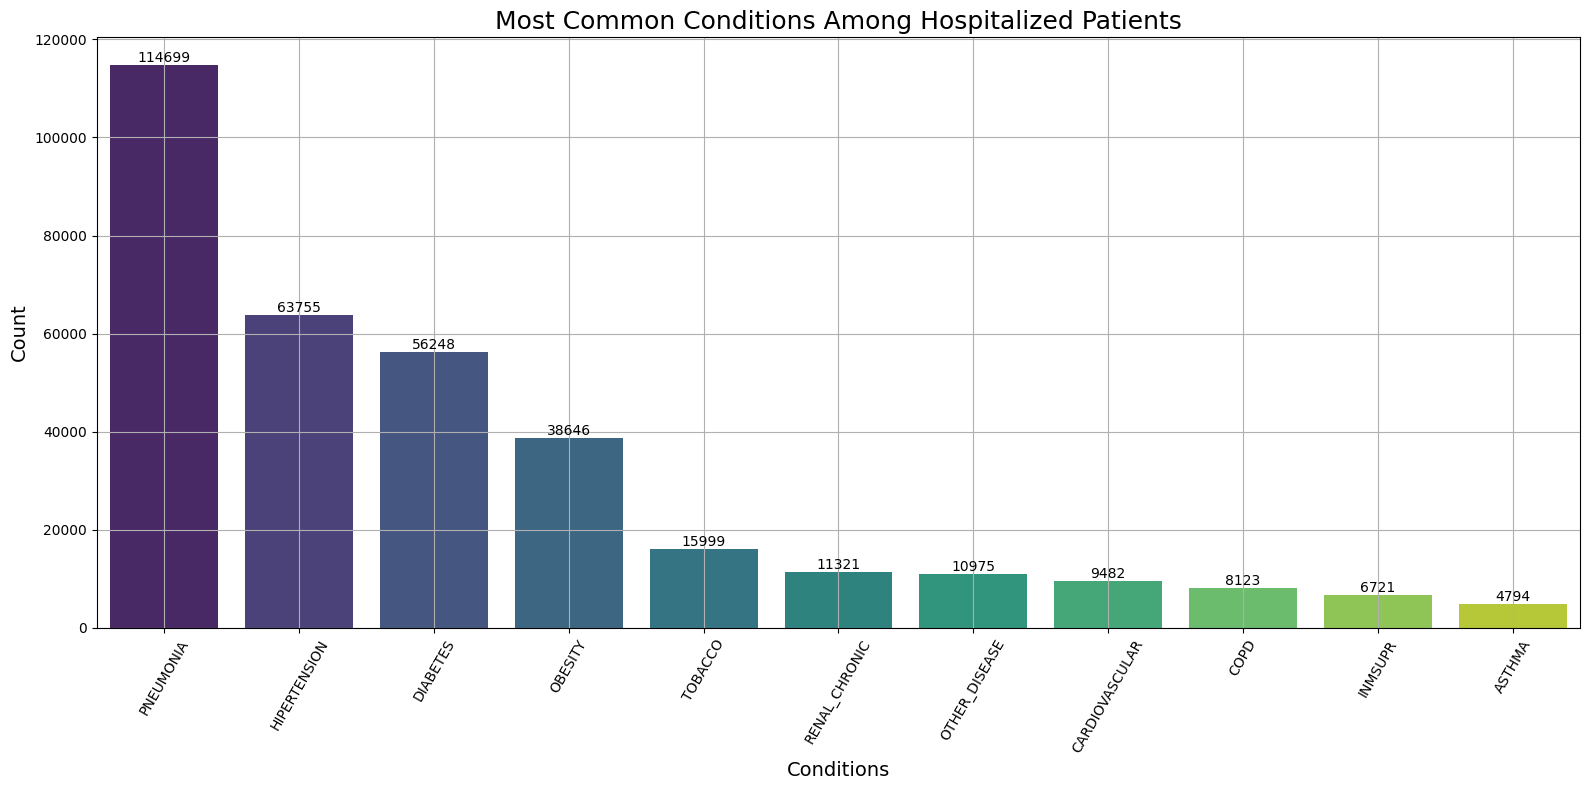

In [121]:
plt.figure(figsize=(16,8))

bar = sns.barplot(data=conditions_in_hospitalized.sort_values(ascending=False), palette='viridis')
for container in bar.containers:
    bar.bar_label(container)

plt.title('Most Common Conditions Among Hospitalized Patients', fontsize=18)
plt.xlabel('Conditions', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=60)
plt.grid(True)
plt.tight_layout()
plt.show()

## 5.4. ICU/Intubation Among Hospitalized Patients

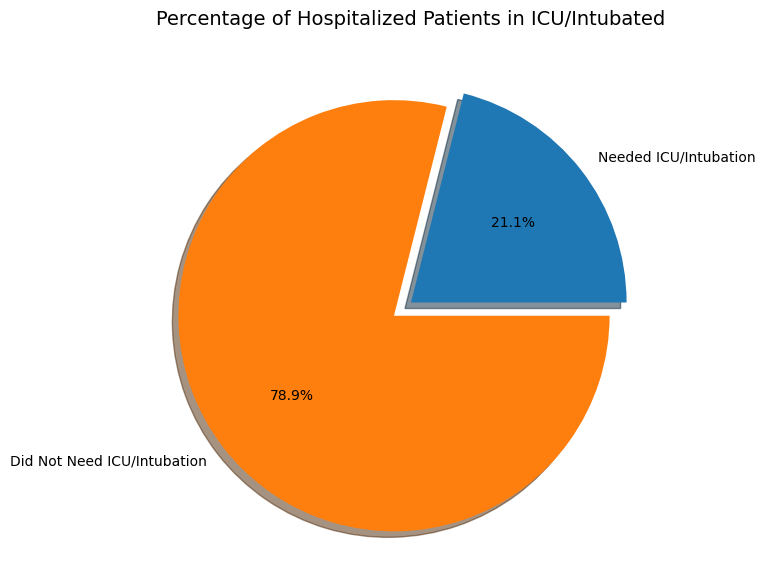

In [122]:
total_hospitalized = covid_data[covid_data['PATIENT_TYPE'] == 'Hospitalized'].shape[0]

icu_intubated = covid_data[(covid_data['PATIENT_TYPE'] == 'Hospitalized') & ((covid_data['ICU'] == 'Yes') | (covid_data['INTUBED'] == 'Yes'))].shape[0]

percentage_icu_intubated = (icu_intubated / total_hospitalized) * 100

labels = ['Needed ICU/Intubation', 'Did Not Need ICU/Intubation']
sizes = [icu_intubated, total_hospitalized - icu_intubated]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode = [0, 0.1], shadow=True)
plt.title("Percentage of Hospitalized Patients in ICU/Intubated", fontsize=14)
plt.show()

# 6. Relationships Between Features

## 6.1. Correlation Between Age, ICU Admission, Intubation, and Death

### 6.1.1. Compute Point-Biserial Correlation (AGE vs. ICU, INTUBED, death_status)

In [123]:
age_severity_df = covid_data_encoded[['AGE'] + severity_indicators]

In [124]:
age_severity_df

,AGE,ICU,INTUBED,death_status
0,65,<NA>,<NA>,1
1,72,<NA>,<NA>,1
2,55,0,1,1
3,53,<NA>,<NA>,1
4,68,<NA>,<NA>,1
...,...,...,...,...
1048570,40,<NA>,<NA>,0
1048571,51,0,0,0
1048572,55,<NA>,<NA>,0
1048573,28,<NA>,<NA>,0


In [125]:
age_severity_df.isna().sum()

AGE                  0
ICU             835564
INTUBED         835406
death_status         0
dtype: int64

In [126]:
age_severity_df.dropna(inplace=True)

In [127]:
age_severity_df.isna().sum()

AGE             0
ICU             0
INTUBED         0
death_status    0
dtype: int64

In [128]:
age_severity_df.shape

(189586, 4)

- **Since `AGE` is numerical and `ICU`, `INTUBED`, and `death_status` are binary, we use Point-Biserial Correlation.**

In [129]:
from scipy.stats import pointbiserialr

In [130]:
icu_age_corr, icu_p = pointbiserialr(age_severity_df['AGE'], age_severity_df['ICU'])
intub_age_corr, intub_p = pointbiserialr(age_severity_df['AGE'], age_severity_df['INTUBED'])
death_age_corr, death_p = pointbiserialr(age_severity_df['AGE'], age_severity_df['death_status'])

print(f"Point-Biserial Correlation (Age vs ICU): {icu_age_corr:.4f}, P-Value: {icu_p:.4f}")
print(f"Point-Biserial Correlation (Age vs INTUBED): {intub_age_corr:.4f}, P-Value: {intub_p:.4f}")
print(f"Point-Biserial Correlation (Age vs Death): {death_age_corr:.4f}, P-Value: {death_p:.4f}")

Point-Biserial Correlation (Age vs ICU): -0.0241, P-Value: 0.0000
Point-Biserial Correlation (Age vs INTUBED): 0.0969, P-Value: 0.0000
Point-Biserial Correlation (Age vs Death): 0.3070, P-Value: 0.0000


### 6.1.2. Compute MCC (ICU, INTUBED, death_status)

- **Since these are binary features, we use Matthews Correlation Coefficient (MCC).**

In [131]:
from sklearn.metrics import matthews_corrcoef

mcc_icu_intubed = matthews_corrcoef(age_severity_df['ICU'], age_severity_df['INTUBED'])
mcc_icu_death = matthews_corrcoef(age_severity_df['ICU'], age_severity_df['death_status'])
mcc_intubed_death = matthews_corrcoef(age_severity_df['INTUBED'], age_severity_df['death_status'])

print(f"MCC (ICU vs INTUBED): {mcc_icu_intubed:.4f}")
print(f"MCC (ICU vs Death): {mcc_icu_death:.4f}")
print(f"MCC (INTUBED vs Death): {mcc_intubed_death:.4f}")


MCC (ICU vs INTUBED): 0.3060
MCC (ICU vs Death): 0.0851
MCC (INTUBED vs Death): 0.4169


### 6.1.3. Visualize Heatmap

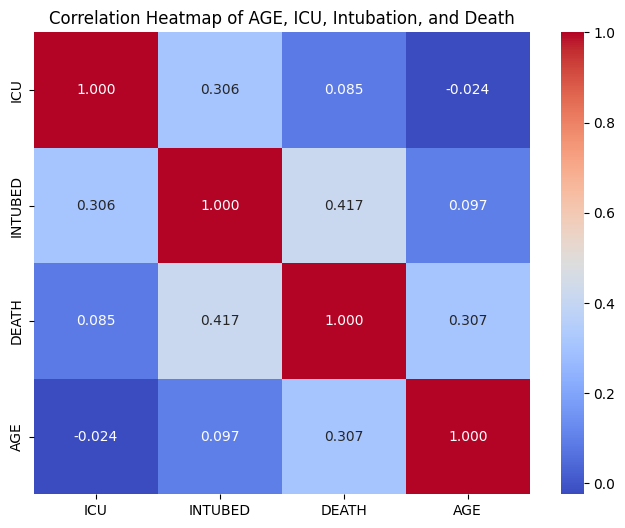

In [132]:
age_severity_corr_df = pd.DataFrame({
    'ICU': [1, mcc_icu_intubed, mcc_icu_death, icu_age_corr],
    'INTUBED': [mcc_icu_intubed, 1, mcc_intubed_death, intub_age_corr],
    'DEATH': [mcc_icu_death, mcc_intubed_death, 1, death_age_corr],
    'AGE' : [icu_age_corr, intub_age_corr, death_age_corr, 1]
}, index=['ICU', 'INTUBED', 'DEATH', 'AGE'])

plt.figure(figsize=(8,6))
sns.heatmap(age_severity_corr_df, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Heatmap of AGE, ICU, Intubation, and Death")
plt.show()


### **🔹 Correlation Analysis Summary**  

1️⃣ **ICU & INTUBED (0.306) → Moderate Positive Correlation**  
   - Patients in ICU are **more likely** to be intubated.  

2️⃣ **INTUBED & DEATH (0.417) → Strongest Correlation**  
   - Intubation is **strongly linked** to higher mortality.  

3️⃣ **AGE & DEATH (0.307) → Moderate Positive Correlation**  
   - Older patients **have a higher risk** of death.  

4️⃣ **AGE & INTUBED (0.097) → Weak Positive Correlation**  
   - Slight trend of **older patients needing intubation**, but not strong.  

5️⃣ **AGE & ICU (-0.024) → No Significant Correlation**  
   - ICU admission **is not dependent** on age.  

### **📝 Key Takeaways:**  
- **Intubation is the strongest predictor of death.**  
- **Age influences mortality but doesn’t strongly affect ICU admission.**  
- **ICU admission and intubation are moderately related.** 🚀

## 6.2. Relationship Between Comorbidities (e.g., Diabetes & Hypertension)

- **Since comorbidities are binary, we use Matthews Correlation Coefficient (MCC).**

In [133]:
comorbidity_corr = {}

for comorb in comorbidities:
    for comorb2 in comorbidities:
        comorbidity_corr[(comorb, comorb2)] = matthews_corrcoef(comorbidity_df[comorb], comorbidity_df[comorb2])

comorbidity_corr
comorbidity_corr_df = pd.DataFrame(comorbidity_corr.values(), index=comorbidity_corr.keys(), columns=['MCC']).reset_index()
comorbidity_corr_df.columns = ['Comorbidity 1', 'Comorbidity 2', 'MCC']

- ### MCC Heatmpap Visualization (Relationship Between Comorbidities)

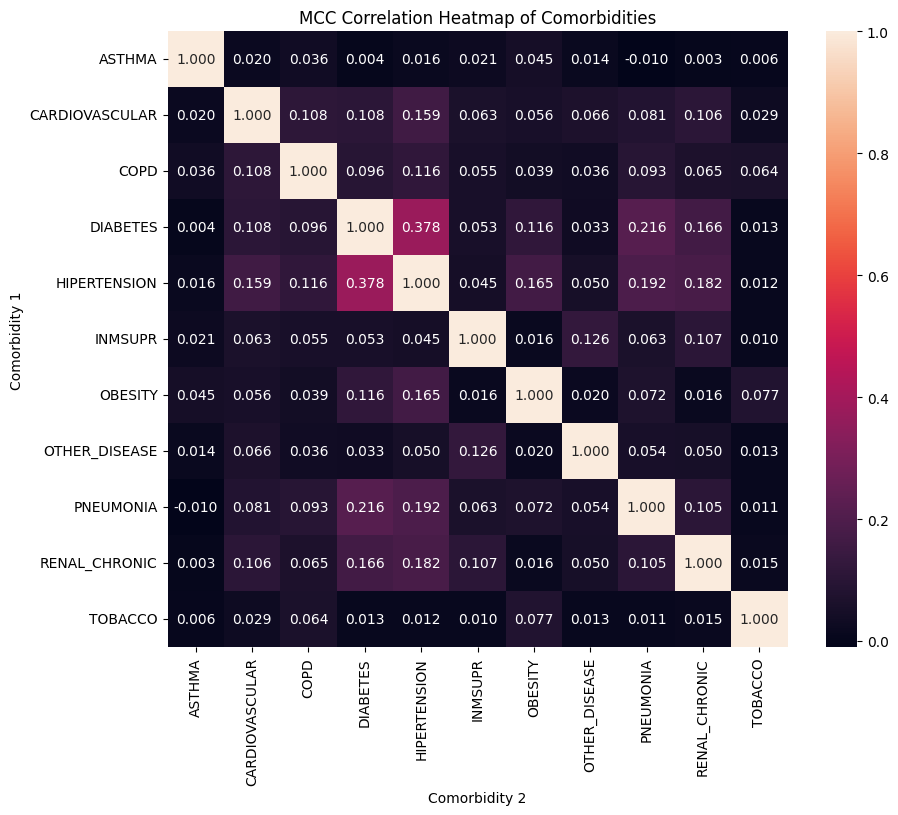

In [134]:
heatmap_data = comorbidity_corr_df.pivot(index='Comorbidity 1', columns='Comorbidity 2', values='MCC')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".3f")
plt.title("MCC Correlation Heatmap of Comorbidities")
plt.show()

### **🔹 Key Insights from Comorbidity Correlation**  

1️⃣ **Strongest Links:**  
   - **Diabetes ↔ Hypertension (0.38)** → Highly correlated.  
   - **Diabetes ↔ Pneumonia (0.22)** → Diabetes may increase pneumonia risk.  
   - **Hypertension ↔ Renal Chronic (0.18)** → Kidney disease is linked to hypertension.  

2️⃣ **Moderate Links:**  
   - **Diabetes ↔ Cardiovascular (0.11)** → Heart disease risk in diabetics.  
   - **Cardiovascular ↔ COPD (0.11)** → Some connection between heart and lung diseases.  

3️⃣ **Weak or No Significant Links:**  
   - **Asthma and Tobacco** show low correlation with other conditions.  

📊 **Conclusion:** Diabetes and hypertension are the most interconnected comorbidities, with notable links to pneumonia, kidney disease, and cardiovascular conditions. 🚀

## **🔍 Final Insights**

### **✅ What factors contribute most to severe cases?**  
#### From correlation analysis:  
1. **Intubation (0.416) and ICU admission (0.306) strongly correlate with death.**  
   - **Patients who were intubated had a significantly higher risk of mortality.**  
2. **Age (0.307) is positively correlated with death.**  
   - **Older patients are more vulnerable to severe cases.**  
3. **Comorbidities like hypertension, diabetes, cardiovascular disease, and renal chronic disease** show moderate correlation with ICU and intubation.  
   - **These conditions increase the likelihood of severe cases.**  
4. **Pneumonia (0.141) and obesity (0.036) also contribute to ICU admission.**  
   - **Pneumonia is a major driver of ICU needs.**  

### **✅ Which groups of patients are at the highest risk?**  
#### From comorbidity correlation and ICU analysis:  
1. **Elderly patients (Age 60+) are at the highest risk** due to strong correlation with mortality.  
2. **Patients with multiple comorbidities (e.g., diabetes + hypertension) have a compounding risk.**  
3. **Patients with severe respiratory conditions (Pneumonia, COPD, Asthma) have a higher ICU/intubation probability.**  
4. **Immunosuppressed patients (INMSUPR) also have moderate risk due to weaker immune responses.**  
5. **Obese individuals have a slightly higher risk of ICU admission.**  

### **✅ What preventive actions could be taken based on patterns?**  
#### Based on the risk factors, here are **data-driven recommendations**:  
1. **Early Screening & Intervention**  
   - Prioritize early testing for **elderly patients and those with multiple comorbidities.**  
   - Monitor high-risk individuals closely to **prevent escalation to ICU.**  

2. **Targeted Vaccination & Medical Attention**  
   - Give **priority vaccinations** to high-risk groups (**elderly, diabetics, hypertensive, immunosuppressed**).  
   - Ensure preemptive treatments for **pneumonia-prone patients.**  

3. **Hospital Resource Allocation**  
   - Increase **ICU preparedness** for patients with **pneumonia, obesity, and multiple comorbidities.**  
   - **More ventilators should be allocated** for patients likely to require intubation.  

4. **Public Health Awareness**  
   - Educate **at-risk populations** on preventive measures like **weight management, blood pressure control, and diabetes care.**  
   - Encourage **quicker hospital visits** for those with pre-existing conditions.  

## **📌 Conclusion**  
#### The above analysis clearly shows that **age, intubation, and ICU admission are key predictors of mortality.**  
- **Pneumonia and obesity drive ICU admission.**  
- **Comorbidities like diabetes & hypertension are interlinked and increase risk.**  
- **Resource planning, early intervention, and awareness campaigns can help mitigate severe cases.**  